# Pobieranie danych z kaggle


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:19<00:00, 232MB/s]
100% 2.04G/2.04G [00:20<00:00, 107MB/s]


# Podpięcie dysku google

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/checkpoints_last/'
os.makedirs(drive_path, exist_ok=True)

Mounted at /content/drive


# Import bibliotek

In [ ]:
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
from collections import Counter
import numpy as np
from torch.utils.data import Subset
import pickle


# Przygotowanie tranformacji i augumetancji danych

In [ ]:

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(degrees = (-30,30)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

# Ładowanie danych

In [ ]:
data_dir = '/content/plantvillage dataset/segmented'

dataset = ImageFolder(data_dir, transform = None)
dataset_transformed = ImageFolder(data_dir, transform = transform)


# Przygotowanie Cross Validation

In [ ]:
from sklearn.model_selection import KFold
folds = 5
kf = KFold(n_splits = folds, shuffle = True, random_state = 0)


# **EDA**

## Ilość klas

In [ ]:
len(dataset.classes)


38

## Nazwy klas

In [ ]:
dataset.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## Ilość obrazów danej klasy

In [ ]:
for category_index, count in Counter(dataset.targets).items():
  category_name = dataset.classes[category_index]
  print(f'Kategoria: {category_name}, liczba obrazów: {count}')

Kategoria: Apple___Apple_scab, liczba obrazów: 630
Kategoria: Apple___Black_rot, liczba obrazów: 621
Kategoria: Apple___Cedar_apple_rust, liczba obrazów: 275
Kategoria: Apple___healthy, liczba obrazów: 1645
Kategoria: Blueberry___healthy, liczba obrazów: 1502
Kategoria: Cherry_(including_sour)___Powdery_mildew, liczba obrazów: 1052
Kategoria: Cherry_(including_sour)___healthy, liczba obrazów: 854
Kategoria: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, liczba obrazów: 513
Kategoria: Corn_(maize)___Common_rust_, liczba obrazów: 1192
Kategoria: Corn_(maize)___Northern_Leaf_Blight, liczba obrazów: 985
Kategoria: Corn_(maize)___healthy, liczba obrazów: 1162
Kategoria: Grape___Black_rot, liczba obrazów: 1180
Kategoria: Grape___Esca_(Black_Measles), liczba obrazów: 1384
Kategoria: Grape___Leaf_blight_(Isariopsis_Leaf_Spot), liczba obrazów: 1076
Kategoria: Grape___healthy, liczba obrazów: 423
Kategoria: Orange___Haunglongbing_(Citrus_greening), liczba obrazów: 5507
Kategoria: Peach___Ba

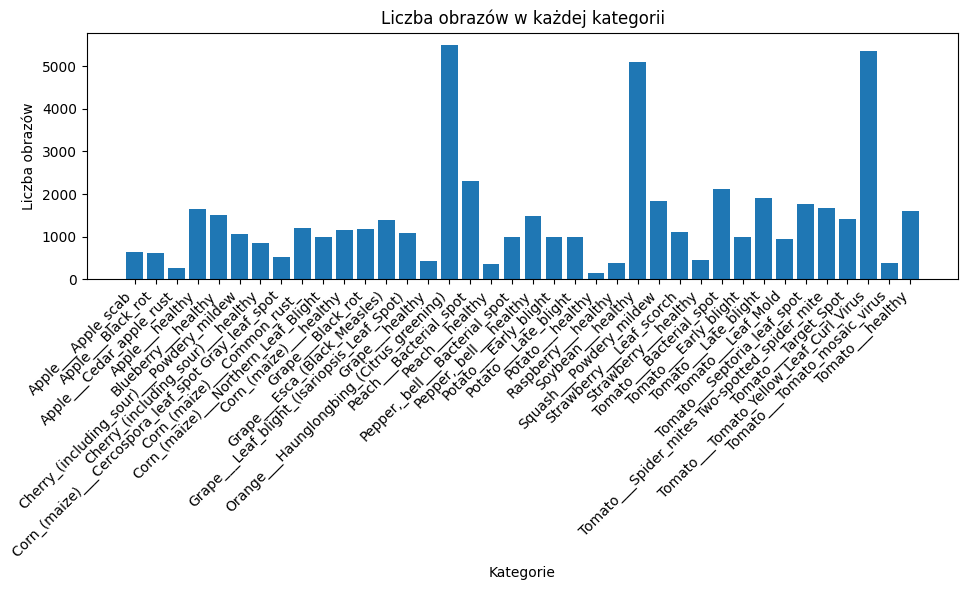

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dataset.classes, Counter(dataset.targets).values())
plt.xlabel('Kategorie')
plt.ylabel('Liczba obrazów')
plt.title('Liczba obrazów w każdej kategorii')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Przykładowe obrazy

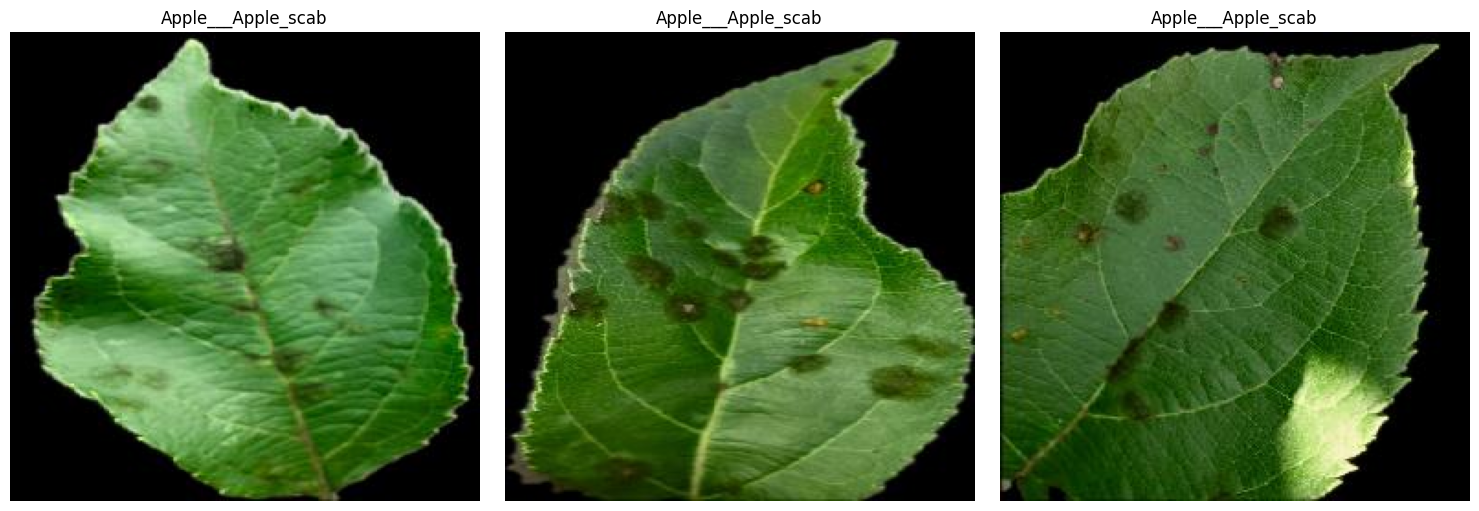

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    img, label = dataset[i]
    axes[i].imshow(img)
    axes[i].set_title(dataset.classes[label])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Kilka przykładowych obrazów po augumentacji

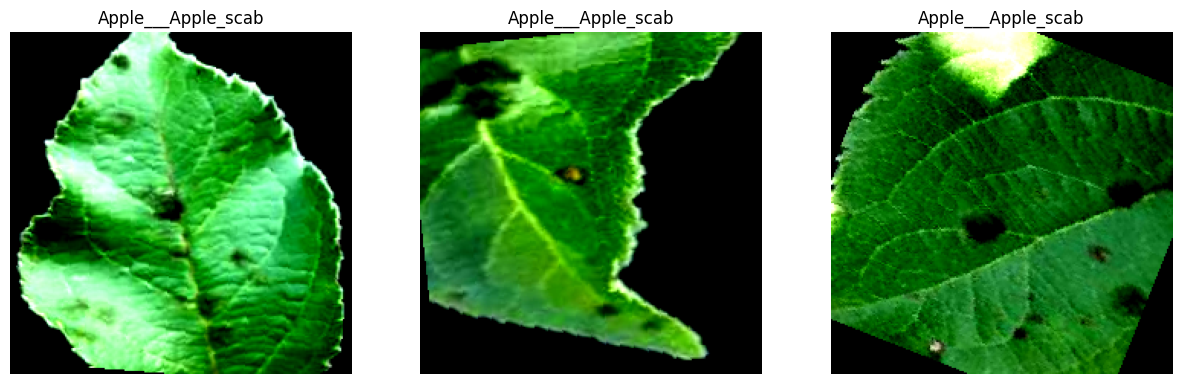

In [ ]:
import torchvision


def show_image(ax, image, label):
    image = image / 2 + 0.5  # Zgodnie ze wzorem na odwrócenie normalizacji
    tensor_to_numpy = image.numpy()
    transposed_image = np.transpose(tensor_to_numpy, (1, 2, 0))  # Zmiana kolejności osi z (C, H, W) na (Height, Width, Channels)
    ax.imshow(transposed_image)
    ax.set_title(label)
    ax.axis('off')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    image, label = dataset_transformed[i]
    show_image(axes[i], image, dataset_transformed.classes[label])




**ZROBIĆ JESZCZE HISTOGRAMY DLA WYBRANYCH KLAS I DLA CAŁOŚCI**

## Historgramy z rozkładami kolorów w obrazach

Konwersją i normalizacją obrazu

In [ ]:
from datasets import load_dataset
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
def process_fn(sample):
    image = sample['image']
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # zmiana przestrzeni kolorów z RGB na BGR

    return image

Wizualizacja Histogramów

In [ ]:
def compute_average_histogram(images, bins=256):

    # Inicjalizacja histogramów
    hist_r = np.zeros(bins)
    hist_g = np.zeros(bins)
    hist_b = np.zeros(bins)

    for image in images:
        hist_r += cv2.calcHist([rgb_image], [0], None, [bins], [0, 256]).flatten()
        hist_g += cv2.calcHist([rgb_image], [1], None, [bins], [0, 256]).flatten()
        hist_b += cv2.calcHist([rgb_image], [2], None, [bins], [0, 256]).flatten()

    # Średnie histogramy
    hist_r /= len(images)
    hist_g /= len(images)
    hist_b /= len(images)


    bins_range = np.arange(bins)
    fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
    axs[0].bar(bins_range, hist_r, color='r', width=1)
    axs[0].set_xlim([0, 256])
    axs[0].set_ylim([0, 2500])
    axs[0].set_title('Average Red Histogram')
    axs[1].bar(bins_range, hist_g, color='g', width=1)
    axs[1].set_xlim([0, 256])
    axs[1].set_ylim([0, 2500])
    axs[1].set_title('Average Green Histogram')
    axs[2].bar(bins_range, hist_b, color='b', width=1)
    axs[2].set_xlim([0, 256])
    axs[2].set_ylim([0, 2500])
    axs[2].set_title('Average Blue Histogram')

    plt.tight_layout()
    plt.show()

### Dla wszystkich obrazów


Resolving data files:   0%|          | 0/54306 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

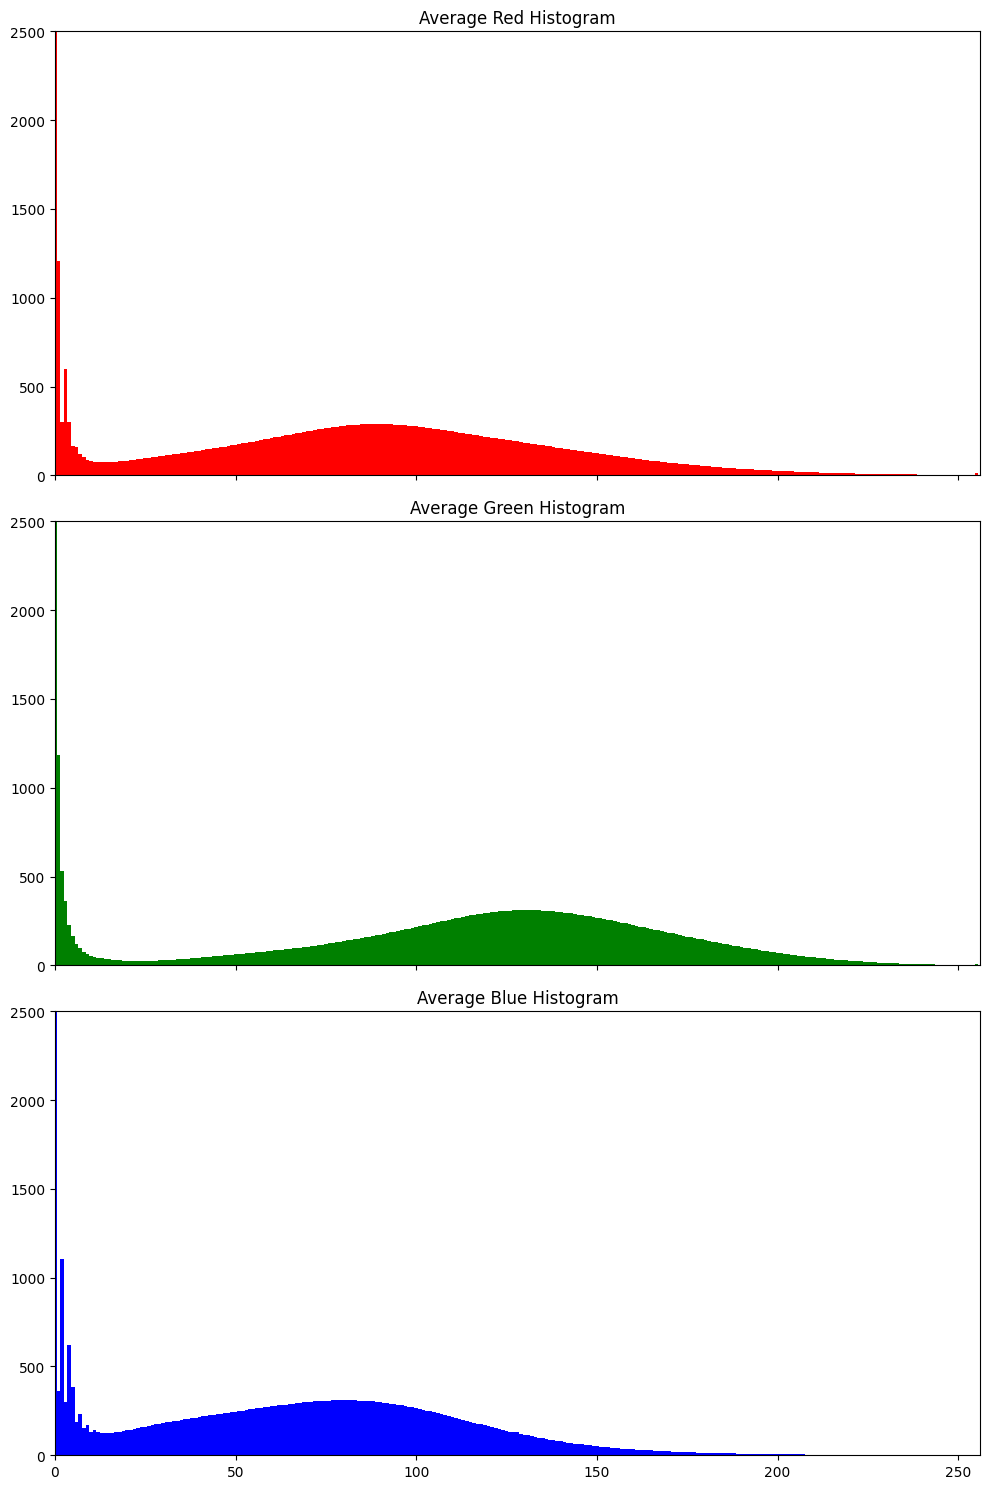

In [ ]:
data = load_dataset('/content/plantvillage dataset/segmented', split='train')
images = [process_fn(sample) for sample in data]
compute_average_histogram(images)

### Dla klasy Apple Scab

Resolving data files:   0%|          | 0/630 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

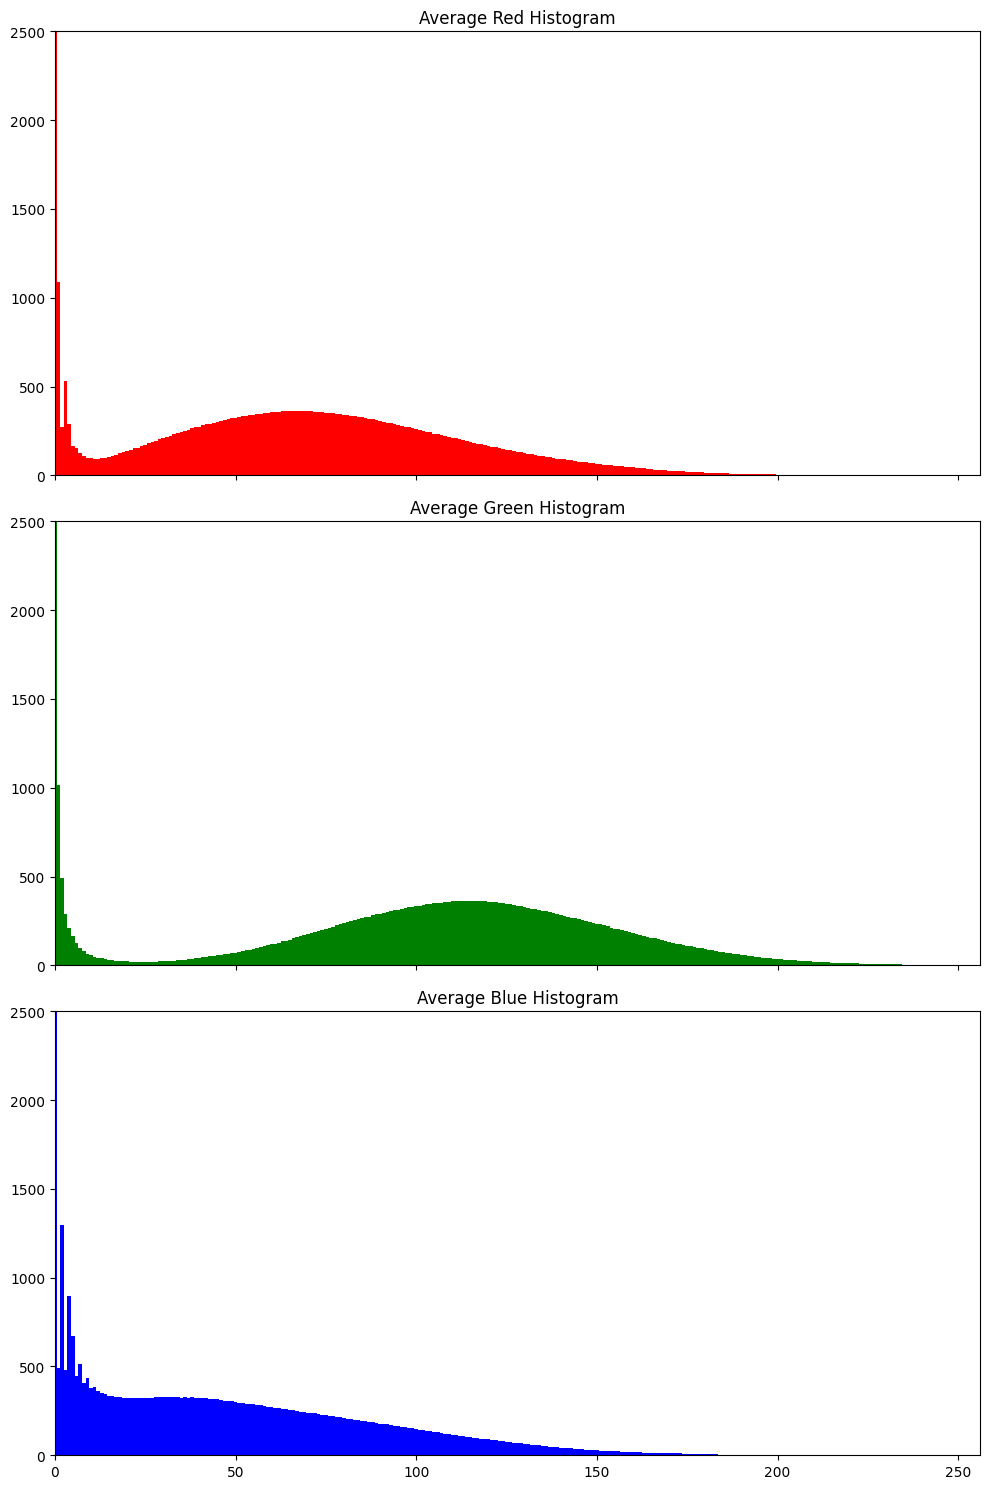

In [ ]:
data = load_dataset('/content/plantvillage dataset/segmented/Apple___Apple_scab', split='train')
images = [process_fn(sample) for sample in data]
compute_average_histogram(images)

### Dla klasy Strawberry healthy

Resolving data files:   0%|          | 0/456 [00:00<?, ?it/s]

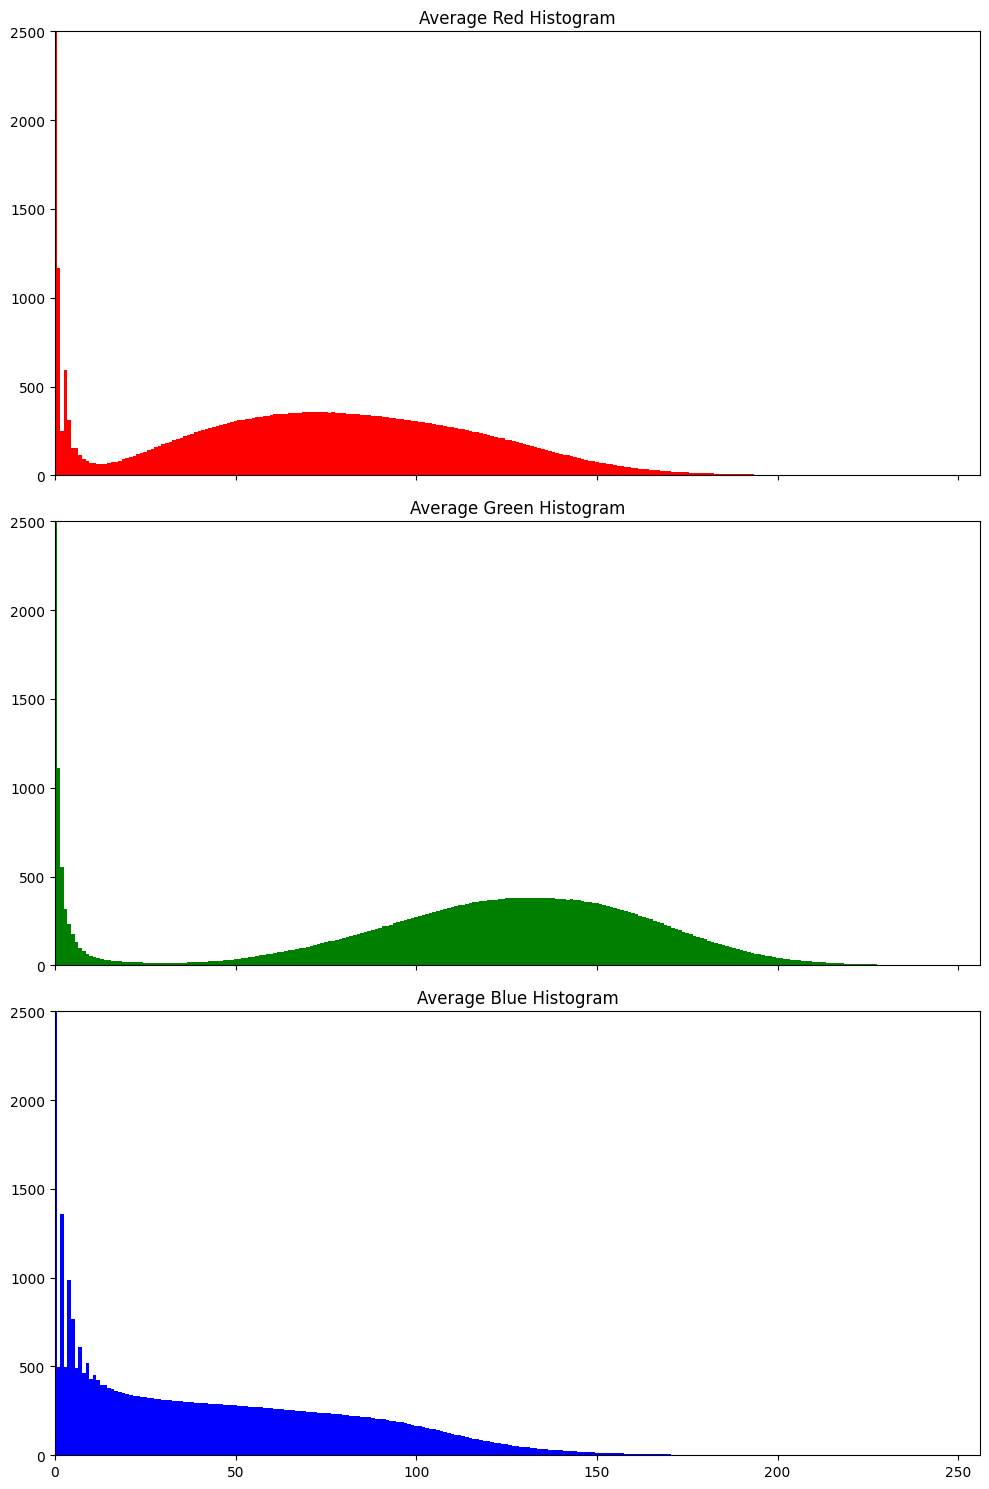

In [ ]:
data = load_dataset('/content/plantvillage dataset/segmented/Strawberry___healthy', split='train')
images = [process_fn(sample) for sample in data]
compute_average_histogram(images)

# Przygotowanie modelu pod fine tuning
## **Wybrany model to ResNet18**

In [ ]:
import torch
from torchvision import models
import torch.nn as nn

model = models.resnet18(pretrained=True)

#Mrożenie wszystkich warstw
for parameters in model.parameters():
  parameters.requires_grad = False

#Odmrożenie ostatnich warstw
for parameters in model.layer4.parameters():
  parameters.requires_grad = True


features_numbers = model.fc.in_features
model.fc = nn.Linear(features_numbers, 38) #nowa ostatnia wartswa



device = torch.device("cuda:0")
model = model.to(device)


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Funkcja straty

In [ ]:
criterion = nn.CrossEntropyLoss()

## Metryka Recall

In [ ]:
from sklearn.metrics import recall_score

## Optymalizator

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Trenowanie modelu

In [ ]:
def training_loop(model, train_loader):
    model.train()
    running_loss = 0.0
    all_labels = []
    all_preds = []

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    epoch_loss = running_loss / len(train_loader.dataset)
    training_recall = recall_score(all_labels, all_preds, average='micro')
    training_class_recall = recall_score(all_labels, all_preds, average=None)

    return epoch_loss, training_recall, training_class_recall


## Walidacja modelu

In [ ]:
from sklearn.metrics import recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
def valid_loop(model, val_loader):
    model.eval()
    validation_loss = 0.0
    all_labels = []
    all_preds = []


    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            probs = torch.nn.functional.softmax(outputs, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())


    epoch_loss = validation_loss / len(val_loader)
    valid_recall = recall_score(all_labels, all_preds, average='micro')
    valid_class_recall = recall_score(all_labels, all_preds, average=None)



    return epoch_loss, valid_recall, valid_class_recall


### Funkcja zapisująca checkpoint podczas wstepnego trenowania modelu

In [ ]:
def save_checkpoint(model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls, file_path):
    checkpoint = {
        'fold': fold,
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_loss': best_loss,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_recalls': train_recalls,
        'val_recalls': val_recalls,
        'train_class_recalls': train_class_recalls,
        'val_class_recalls': val_class_recalls
    }
    torch.save(checkpoint, file_path)
    print(f'Checkpoint saved at {file_path}')

## Trenowanie i walidowanie modelu

In [ ]:
from torch.utils.data import Subset

num_epochs = 10
train_losses = []
val_losses = []
train_recalls = []
val_recalls = []
train_class_recalls = []
val_class_recalls = []
save_interval = 2
best_loss = float('inf')

for fold, (train_index, valid_index) in enumerate(kf.split(dataset_transformed)):
  print(f'FOLD {fold}')
  print('--------------------------------')

  train_subset = Subset(dataset_transformed, train_index)
  valid_subset = Subset(dataset_transformed, valid_index)

  train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
  val_loader = DataLoader(valid_subset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

  for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')
    print('--------------------------------')

    training_loss, training_recall, training_class_recall = training_loop(model, train_loader)

    train_losses.append(training_loss)
    train_recalls.append(training_recall)
    train_class_recalls.append(training_class_recall)

    print(f'Training loss: {training_loss}')
    print(f'Training recall: {training_recall}')

    valid_loss, valid_recall,valid_class_recall = valid_loop(model, val_loader)

    val_losses.append(valid_loss)
    val_recalls.append(valid_recall)
    val_class_recalls.append(valid_class_recall)

    print(f'Valid loss: {valid_loss}')
    print(f'Valid recall: {valid_recall}')

    if valid_loss < best_loss:

      best_loss = valid_loss
      save_checkpoint(model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls,drive_path + 'best_model.pt')

    if (epoch + 1) % save_interval == 0:
      save_checkpoint(model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls, drive_path + f'model_fold_{fold}_epoch_{epoch + 1}.pt')









FOLD 0
--------------------------------
Epoch: 1
--------------------------------
Training loss: 0.01662501716541603
Training recall: 0.8400009207255317
Valid loss: 0.2858925552567491
Valid recall: 0.9071994107899097
Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints/best_model.pt
Epoch: 2
--------------------------------
Training loss: 0.009230406279694956
Training recall: 0.9077433017217568
Valid loss: 0.21089450565110276
Valid recall: 0.9321487755477813
Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints/best_model.pt
Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints/model_fold_0_epoch_2.pt
Epoch: 3
--------------------------------
Training loss: 0.007701949408074987
Training recall: 0.9220375656016941
Valid loss: 0.1988153104967911
Valid recall: 0.9380408764500092
Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints/best_model.pt
Epoch: 4
--------------------------------
Training loss: 0.0065835564217

**Model uczył się 2h 38min**

## Ładowanie wytrenowanego modelu

In [ ]:
def load_checkpoint(file_path, model, optimizer):
    checkpoint = torch.load(file_path, map_location=torch.device('cpu'))

    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    fold = checkpoint['fold']
    epoch = checkpoint['epoch']
    best_loss = checkpoint['best_loss']
    train_losses = checkpoint['train_losses']
    val_losses = checkpoint['val_losses']
    train_recalls = checkpoint['train_recalls']
    val_recalls = checkpoint['val_recalls']
    train_class_recalls = checkpoint['train_class_recalls']
    val_class_recalls = checkpoint['val_class_recalls']
    return model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls

## Odczytywanie wstępnie przeszkolonego modelu

In [ ]:
trained_model_path = '/content/drive/My Drive/Colab Notebooks/checkpoints/model_fold_4_epoch_10.pt'
model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls = load_checkpoint(trained_model_path, model, optimizer)

model_on_gpu = next(model.parameters()).is_cuda

print(f"Model on GPU: {model_on_gpu}")


Model on GPU: True


## Wykres Training & Validation Loss na przestrzeni epok w każdym foldzie  

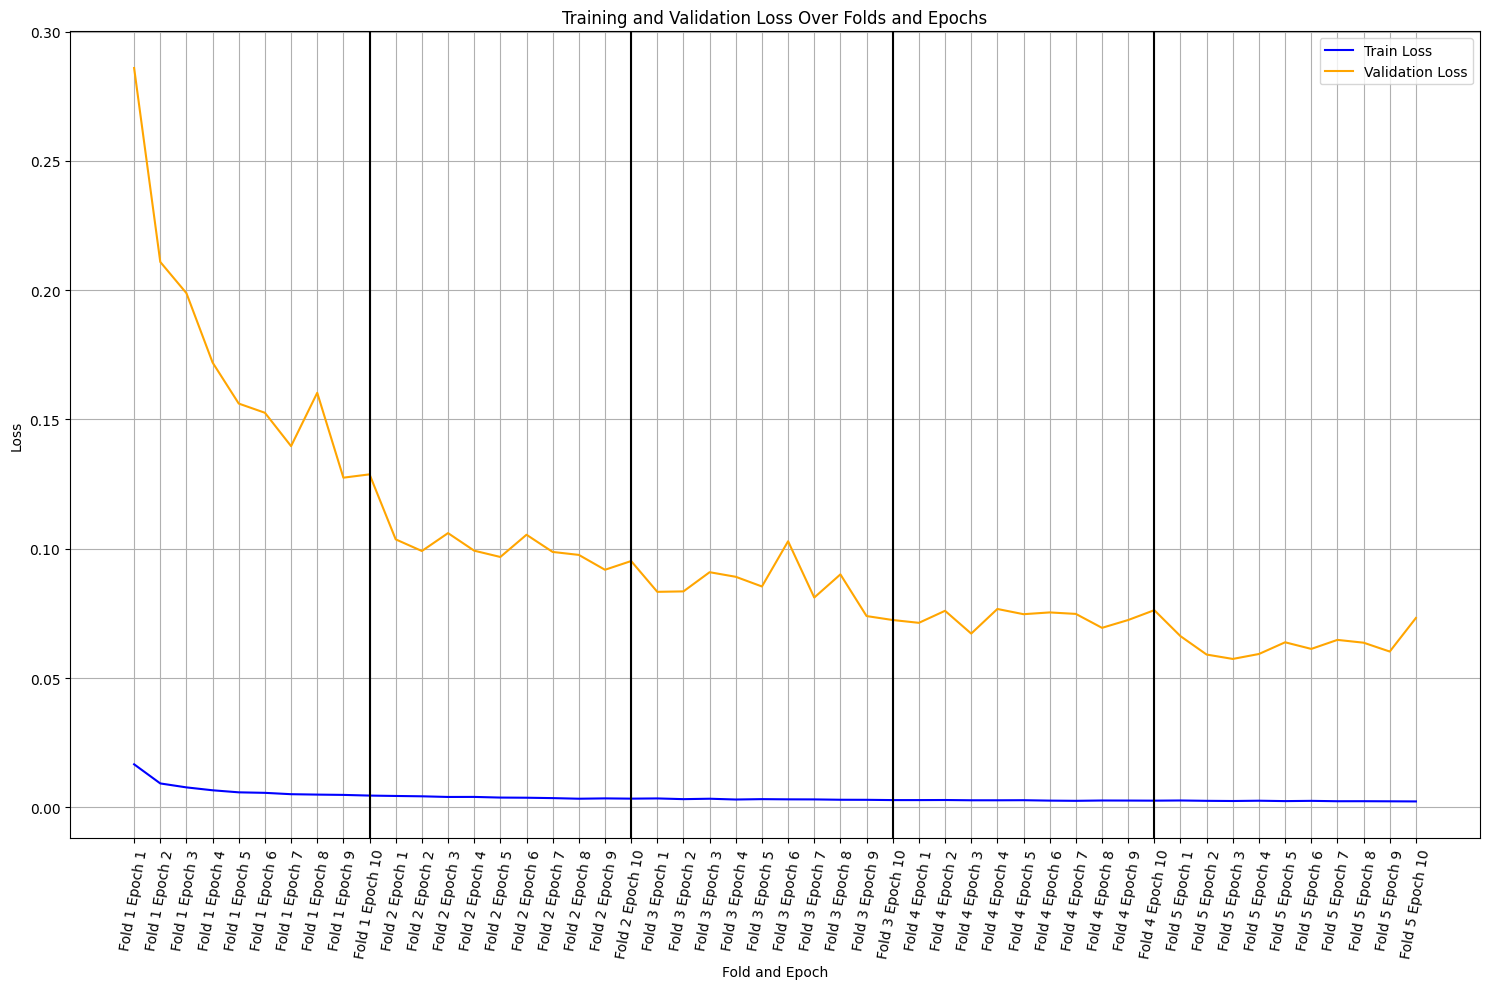

In [ ]:
num_folds = folds
num_epochs_per_fold = 10


folds_epochs = []
for fold in range(1, num_folds + 1):
    for epoch in range(1, num_epochs_per_fold + 1):
        folds_epochs.append(f'Fold {fold} Epoch {epoch}')


plt.figure(figsize=(15, 10))
plt.plot(folds_epochs, train_losses, label='Train Loss', color='blue')
plt.plot(folds_epochs, val_losses, label='Validation Loss', color='orange')


for i in range(1, num_folds):
    plt.axvline(x=i * num_epochs_per_fold -1 , color='black', linestyle='-')

plt.xlabel('Fold and Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Folds and Epochs')
plt.xticks(rotation=80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Model osiągnął najlepsze wyniki Foldzie 5 epoka 3 (czyli można powiedzieć że w 43 epoce), oto dokładne rezultaty:
*   training loss: 0.0024353454601717416
*   validation loss: 0.05737536915840685
### Analizując powyższe wyniki dochodzimy do wniosku, że model działa poprawnie, ale niewielka różnica między stratami treningowymi i walidacyjnymi wskazuje że można by jeszcze popracować nad poprawą generalizacji modelu

### Po epoce 43 model ulega nieznaczemu przetrenowaniu, ponieważ strata walidacyjna zaczyna rosnąć a to sugeruje że model zaczyna zapamiętywać szczegóły danych treningowych zamiast uogólniać wzorce i prowadzi to do gorszej wydajności na danych walidacyjnych - jest to sygnał że model być może jest zbyt dobrze dopasowany do danych treningowych, ale nie potrafi dobrze przewidywać na zbiorze walidacyjnym   





## Wykres Training & Validation Recall na przestrzeni epok w każdym foldzie  

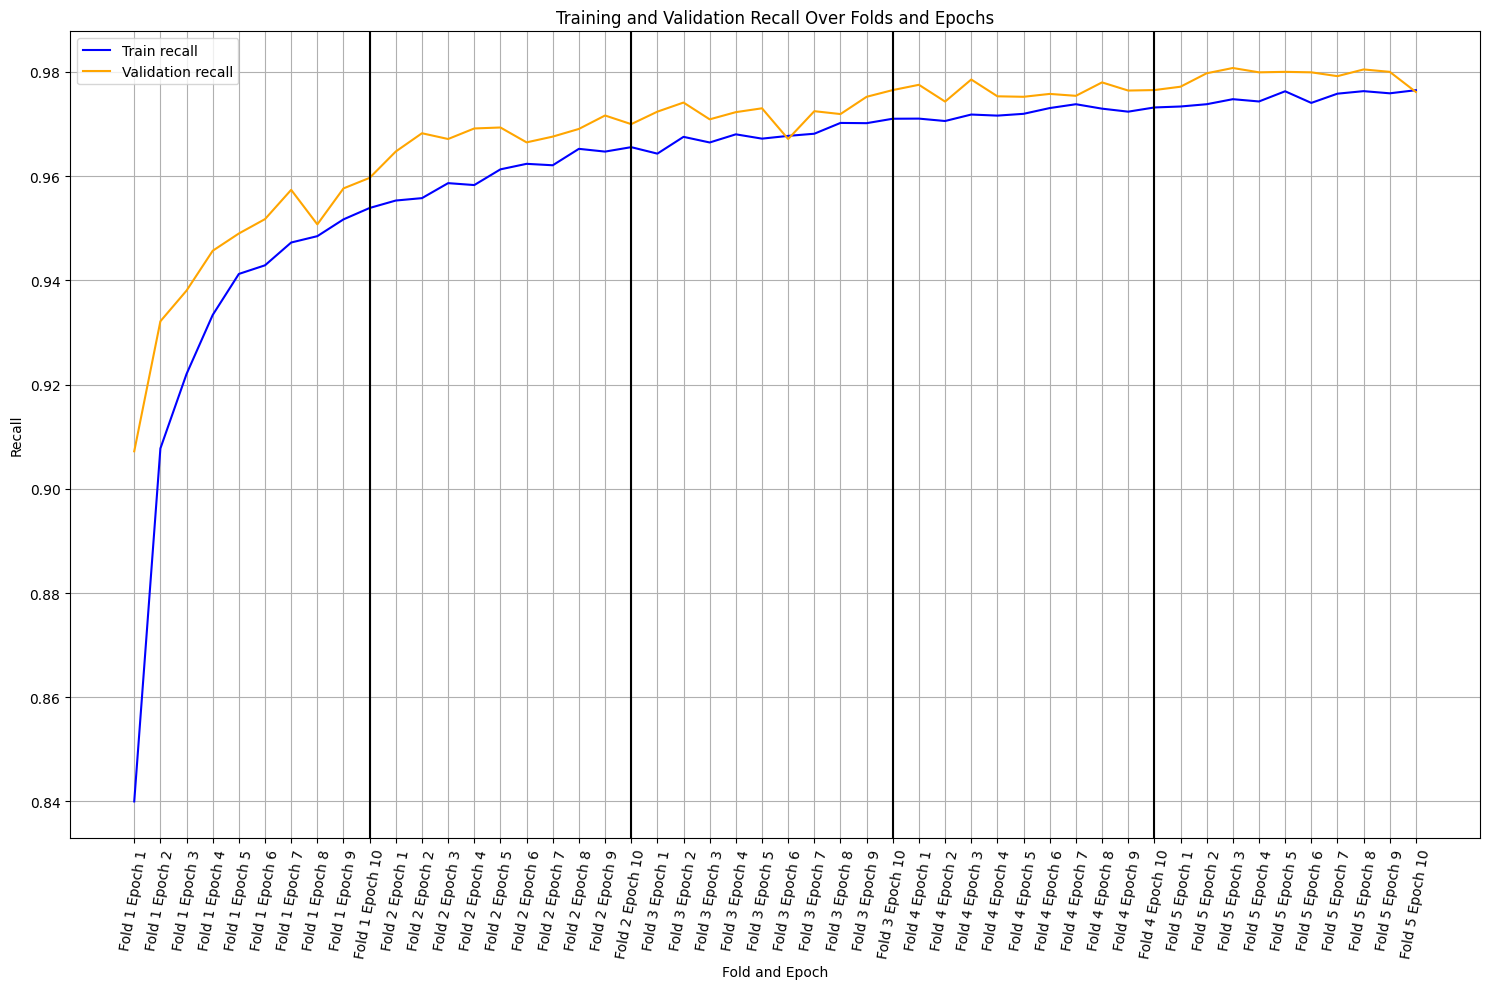

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(folds_epochs, train_recalls, label='Train recall', color='blue')
plt.plot(folds_epochs, val_recalls, label='Validation recall', color='orange')


for i in range(1, num_folds):
    plt.axvline(x=i * num_epochs_per_fold -1 , color='black', linestyle='-')

plt.xlabel('Fold and Epoch')
plt.ylabel('Recall')
plt.title('Training and Validation Micro Recall Over Folds and Epochs')
plt.xticks(rotation=80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Powyższy wykres przedstawia zmianę metryki micro recall (czułość) na przestrzeni epok w różnych foldach, im wyższy micro recall tym lepiej - micro recall mówi o tym, jak dobrze model klasyfikuje wszystkie przypadki łącznie, bez względu na klasę

## Wzór na micro recall
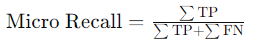

TP - True positives - przypadki sklasifykowane poprawnie
FN - False Negatives - przypadki sklasyfikowane niepoprawnie

### Nasz model osiągnał najlepsze rezultaty metryki recall w foldzie 5 epoka 3 (czyli można powiedzieć że w epoce 43), oto dokładne rezultaty:
*   training micro recall: 0.9747727011163541
*   valid micro recall: 0.980756836387073
### Uzyskane wyniki mówią, że model ma bardzo dobrą zdolność rozpoznawania pozytywnych przypadków zarówno na danych treningowych (ok. 97% prawidłowo rozpoznanych obrazów), jak i walidacyjnych (ok. 98% prawidłowo rozpoznanych obrazów). Wysoka wartość recall na obu zbiorach sugeruje, że model nie tylko nauczył się dobrze rozpoznawać wzorce w danych treningowych, ale również skutecznie stosuje te wzorce do nowych danych

## **Dlaczego micro a nie makro?**
### Micro Recall traktuje każdy obraz równomiernie - niezależnie od tego do której klasy przynależy - oznacza to że błąd w klasyfikacji jednego obrazu z klasy z dużą ilością obrazów ma taki sam wpływ na wynik recall jak błąd w klasyfikacji jednego obrazu z klasy z małą ilością obrazów, natomiast makro recall traktuje każdą klasę równomiernie - oznacza to że recall dla każdej klasy ma taki sam wpływ na końcowy wynik macro recall, niezależnie od tego, czy klasa ma wiele instancji, czy tylko kilka z tego też powodu w przypadku naszego problemu na podstawie wcześniej przeprowadzonego EDA wybieramy Micro Recall ponieważ nasze klasy nie są zrównoważone np. klasa Peach_healthy ma obrazów: 360 a klasa Orange_Haunglongbing_(Citrus_greening) aż 5507 obrazów

## Wykres Training & Validation Recall na przestrzeni epok w każdym foldzie  dla każdej klasy

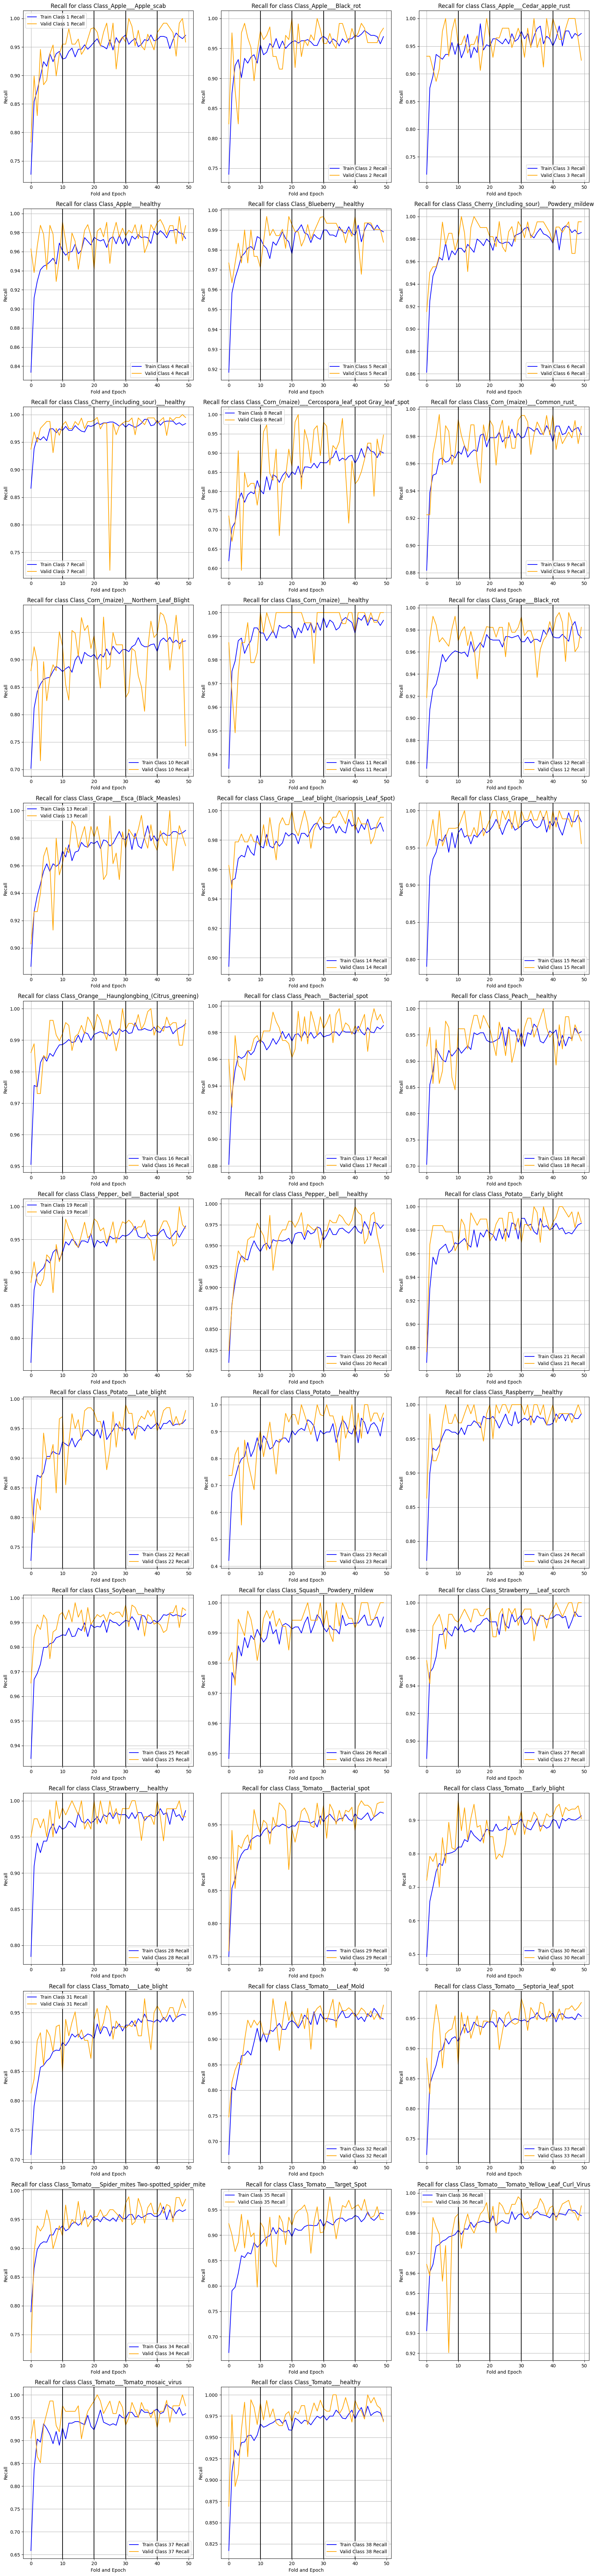

In [ ]:
dataset_classes = [f'Class_{class_name}' for class_name in dataset.classes]

# Przygotowanie danych
training_class_recalls = {i: [] for i in range(1, 39)}
for recalls in train_class_recalls:
    for class_idx, recall in enumerate(recalls, start=1):
        training_class_recalls[class_idx].append(recall)

valid_class_recalls = {i: [] for i in range(1, 39)}
for recalls in val_class_recalls:
    for class_idx, recall in enumerate(recalls, start=1):
        valid_class_recalls[class_idx].append(recall)


num_classes = 38


num_cols = 3
num_rows = (num_classes + num_cols - 1) // num_cols

# Tworzenie wykresów
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axs = axs.flatten()

for class_idx in range(1, num_classes + 1):
    axs[class_idx - 1].plot(training_class_recalls[class_idx], label=f'Train Class {class_idx} Recall', color='blue')
    axs[class_idx - 1].plot(valid_class_recalls[class_idx], label=f'Valid Class {class_idx} Recall', color='orange')


    for i in range(1, num_folds):
        axs[class_idx - 1].axvline(x=i * num_epochs_per_fold, color='black', linestyle='-')

    axs[class_idx - 1].set_xlabel('Fold and Epoch')
    axs[class_idx - 1].set_ylabel('Recall')
    axs[class_idx - 1].set_title(f'Recall for class {dataset_classes[class_idx - 1]}')
    axs[class_idx - 1].legend()
    axs[class_idx - 1].grid(True)

# Usuwanie pustych wykresów
for i in range(num_classes, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

### Powyższy wykres przedstawia zmianę metryki recall na przestrzeni epok w różnych foldach dla każdej klasy osobno

### Na podstawie załączonych wykresów możemy powiedzieć, że model najlepiej klasyfikuje obrazy klas (recall = 1 [100% poprawnie rozpoznanych obrazów]):

*   Apple black root
*   Cedar_apple_rust
*   Cherry (including sour) powdery mildew
*   Cherry (including sour) healthy
*   Corn (maize) Cercospora leaf spot Gray leaf spot
*   Corn (maize) healthy
*   Grape Esca (black measles)
*   Grape leaf blight (isariopsis leaf spot)
*   Grape healthy
*   Orange haunglongbing (Cirtur greening)
*   Peach healthy
*   Pepper bell bacterial spot
*   Potato early blight
*   Potato healthy
*   Raspberry healthy
*   Squash powdery mildew
*   Strawberry leaf scorch
*   Strawberry healthy
*   Tomato mosaic virus
*   Tomato healthy

(łącznie 20 klas zostało rozpoznanych ze 100% skutecznością)

### Najgorzej obrazy klasy Tomato early blight (recall = 0.9578947368421052)

Szukanie klasy z najniższą najwyższą wartością recall

In [ ]:
c10 = []
c29 = []
c30 = []
c31 = []
c32 = []
c33 = []
c35 = []
for i in range(0,50):
  c10.append(val_class_recalls[i][9])
  c29.append(val_class_recalls[i][28])
  c30.append(val_class_recalls[i][29])
  c31.append(val_class_recalls[i][30])
  c32.append(val_class_recalls[i][31])
  c33.append(val_class_recalls[i][32])
  c35.append(val_class_recalls[i][34])



In [ ]:
max_c10 = max(c10) if c10 else None
max_c29 = max(c29) if c29 else None
max_c30 = max(c30) if c30 else None
max_c31 = max(c31) if c31 else None
max_c32 = max(c32) if c32 else None
max_c33 = max(c33) if c33 else None
max_c35 = max(c35) if c35 else None

print("Największa wartość w c10:", max_c10)
print("Największa wartość w c29:", max_c29)
print("Największa wartość w c30:", max_c30)
print("Największa wartość w c31:", max_c31)
print("Największa wartość w c32:", max_c32)
print("Największa wartość w c33:", max_c33)
print("Największa wartość w c35:", max_c35)

Największa wartość w c10: 0.9857142857142858
Największa wartość w c29: 0.9863325740318907
Największa wartość w c30: 0.9578947368421052
Największa wartość w c31: 0.9736842105263158
Największa wartość w c32: 0.9787234042553191
Największa wartość w c33: 0.9824561403508771
Największa wartość w c35: 0.9757785467128027


# Optymalizacja hiperparametrów przy użyciu optymalizacji bayesowskiej

### Funkcja zapisująca checkpoint podczas optymalizacji bayesowskiej

In [ ]:
def save_checkpoint_bayes(model, optimizer, trial, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls, avg_auc, roc_auc_dict, file_path):
    checkpoint = {
        'trial_number': trial.number,
        'fold': fold,
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_loss': best_loss,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_recalls': train_recalls,
        'val_recalls': val_recalls,
        'train_class_recalls': train_class_recalls,
        'val_class_recalls': val_class_recalls,
        'avg_auc': avg_auc,
        'roc_auc_dict': roc_auc_dict,
        'optimizer_name': trial.params['optimizer'],
        'learning_rate': trial.params['learning_rate'],

        'momentum': trial.params.get('momentum'),
        'beta1': trial.params.get('beta1'),
        'beta2': trial.params.get('beta2')
    }
    torch.save(checkpoint, file_path)
    print(f'Checkpoint saved at {file_path}')


## **Optymalizacja Bayesowska**

In [ ]:

def objective(trial):
    momentum = None
    optimizer_name = trial.suggest_categorical('optimizer', ['SGD', 'Adam', 'RMSprop'])
    lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    num_epochs = 10
    batch_size = 32
    if optimizer_name == 'SGD':
        momentum = trial.suggest_uniform('momentum', 0.8, 0.99)

    if optimizer_name == 'Adam':
        beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
        beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
    else:
        beta1, beta2 = None, None

    print(f'Trial {trial.number}: Optimizer={optimizer_name}, Learning Rate={lr}, Batch Size={batch_size}, Epochs={num_epochs}')

    if momentum is not None:
        print(f'Momentum={momentum}')
    if beta1 is not None and beta2 is not None:
        print(f'Beta1={beta1}, Beta2={beta2}')


    fold_val_losses = []
    fold_train_losses = []
    fold_train_recalls = []
    fold_val_recalls = []
    fold_train_class_recalls = []
    fold_val_class_recalls = []
    fold_avg_aucs = []
    best_val_loss = float('inf')

    for fold, (train_index, valid_index) in enumerate(kf.split(dataset)):

        print(f'FOLD {fold}')
        print('--------------------------------')
        train_subset = Subset(dataset_transformed, train_index)
        valid_subset = Subset(dataset_transformed, valid_index)

        train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
        val_loader = DataLoader(valid_subset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)



        if optimizer_name == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
        elif optimizer_name == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr, betas=(beta1, beta2))
        elif optimizer_name == 'RMSprop':
            optimizer = optim.RMSprop(model.parameters(), lr=lr)

        train_loss, train_recall, train_class_recall = training_loop(model, train_loader, optimizer, criterion)

        val_loss, val_recall, val_class_recall, avg_auc, roc_auc_dict = valid_loop(model, val_loader, criterion)

        fold_train_losses.append(train_loss)
        fold_val_losses.append(val_loss)
        fold_train_recalls.append(train_recall)
        fold_val_recalls.append(val_recall)
        fold_train_class_recalls.append(train_class_recall)
        fold_val_class_recalls.append(val_class_recall)
        fold_avg_aucs.append(avg_auc)



        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_path = f'/content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_{trial.number}.pt'
            save_checkpoint_bayes(model, optimizer, trial, fold, num_epochs, best_val_loss, fold_train_losses, fold_val_losses, fold_train_recalls, fold_val_recalls, fold_train_class_recalls, fold_val_class_recalls, avg_auc, roc_auc_dict, best_model_path)
            print(f'New best model saved for trial {trial.number}, fold {fold} at epoch {num_epochs} with val_loss {val_loss}')

        avg_val_loss = sum(fold_val_losses) / len(fold_val_losses)
        avg_avg_auc = sum(fold_avg_aucs) / len(fold_avg_aucs)

        print(f'Trial {trial.number} completed with avg_val_loss={avg_val_loss} and avg_avg_auc = {avg_avg_auc}')


        return avg_val_loss #zwracana metryka do dalszej optymalizacji

In [ ]:

import optuna
os.makedirs('/content/drive/My Drive/Colab Notebooks/checkpoints_bayes', exist_ok=True)

# Uruchomienie optymalizacji
study = optuna.create_study(direction='minimize') #tworzymy badanie
study.optimize(objective, n_trials=50)

print(f'Best Trial: {study.best_trial.value}')
print(f'Best Parameters: {study.best_trial.params}')

[I 2024-06-09 22:10:16,903] A new study created in memory with name: no-name-ac5921ff-7c05-419a-bdac-73a9c1ecd495


Trial 0: Optimizer=RMSprop, Learning Rate=0.00017693012271399522, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:13:31,226] Trial 0 finished with value: 0.19553570162371375 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.00017693012271399522}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_0.pt
New best model saved for trial 0, fold 0 at epoch 10 with val_loss 0.19553570162371375
Trial 0 completed with avg_val_loss=0.19553570162371375 and avg_avg_auc = 0.9991553673653654
Trial 1: Optimizer=RMSprop, Learning Rate=0.029553274913582908, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:16:48,667] Trial 1 finished with value: 0.49919462007579996 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.029553274913582908}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_1.pt
New best model saved for trial 1, fold 0 at epoch 10 with val_loss 0.49919462007579996
Trial 1 completed with avg_val_loss=0.49919462007579996 and avg_avg_auc = 0.9956321207559705
Trial 2: Optimizer=RMSprop, Learning Rate=0.0026512803976426226, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:20:05,077] Trial 2 finished with value: 0.29659390660235657 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0026512803976426226}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_2.pt
New best model saved for trial 2, fold 0 at epoch 10 with val_loss 0.29659390660235657
Trial 2 completed with avg_val_loss=0.29659390660235657 and avg_avg_auc = 0.997988878931971
Trial 3: Optimizer=Adam, Learning Rate=0.04183220419080651, Batch Size=32, Epochs=10
Beta1=0.8113690287767137, Beta2=0.9689365876694662
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-09 22:23:21,891] Trial 3 finished with value: 0.3571044924945454 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.041832204190806

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_3.pt
New best model saved for trial 3, fold 0 at epoch 10 with val_loss 0.3571044924945454
Trial 3 completed with avg_val_loss=0.3571044924945454 and avg_avg_auc = 0.9973254755299922
Trial 4: Optimizer=SGD, Learning Rate=0.0008011301063817153, Batch Size=32, Epochs=10
Momentum=0.8517096138330239
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 22:26:40,760] Trial 4 finished with value: 0.3068218887422357 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.0008011301063817153, 'momentum': 0.8517096138330239}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_4.pt
New best model saved for trial 4, fold 0 at epoch 10 with val_loss 0.3068218887422357
Trial 4 completed with avg_val_loss=0.3068218887422357 and avg_avg_auc = 0.9977521866119646
Trial 5: Optimizer=SGD, Learning Rate=0.010354588101165518, Batch Size=32, Epochs=10
Momentum=0.8390189620240139
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 22:29:53,241] Trial 5 finished with value: 0.2908880449307617 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.010354588101165518, 'momentum': 0.8390189620240139}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_5.pt
New best model saved for trial 5, fold 0 at epoch 10 with val_loss 0.2908880449307617
Trial 5 completed with avg_val_loss=0.2908880449307617 and avg_avg_auc = 0.9978656721403594
Trial 6: Optimizer=RMSprop, Learning Rate=0.006841504738272129, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:33:10,186] Trial 6 finished with value: 0.24492286322578471 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.006841504738272129}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_6.pt
New best model saved for trial 6, fold 0 at epoch 10 with val_loss 0.24492286322578471
Trial 6 completed with avg_val_loss=0.24492286322578471 and avg_avg_auc = 0.9985149449816914
Trial 7: Optimizer=RMSprop, Learning Rate=0.03173199592268348, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:36:21,867] Trial 7 finished with value: 0.36849098497520627 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.03173199592268348}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_7.pt
New best model saved for trial 7, fold 0 at epoch 10 with val_loss 0.36849098497520627
Trial 7 completed with avg_val_loss=0.36849098497520627 and avg_avg_auc = 0.9974192270670021
Trial 8: Optimizer=RMSprop, Learning Rate=0.08422806809662009, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:39:36,434] Trial 8 finished with value: 0.4195521785715006 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.08422806809662009}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_8.pt
New best model saved for trial 8, fold 0 at epoch 10 with val_loss 0.4195521785715006
Trial 8 completed with avg_val_loss=0.4195521785715006 and avg_avg_auc = 0.9963100113819057
Trial 9: Optimizer=Adam, Learning Rate=0.0057202224573154456, Batch Size=32, Epochs=10
Beta1=0.9599154684575095, Beta2=0.909486133353842
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-09 22:42:52,488] Trial 9 finished with value: 0.28468036186694756 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00572022245731

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_9.pt
New best model saved for trial 9, fold 0 at epoch 10 with val_loss 0.28468036186694756
Trial 9 completed with avg_val_loss=0.28468036186694756 and avg_avg_auc = 0.9978741566357945
Trial 10: Optimizer=SGD, Learning Rate=0.00010463260048622247, Batch Size=32, Epochs=10
Momentum=0.9833315398488927
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 22:46:05,125] Trial 10 finished with value: 0.26291435536270324 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00010463260048622247, 'momentum': 0.9833315398488927}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_10.pt
New best model saved for trial 10, fold 0 at epoch 10 with val_loss 0.26291435536270324
Trial 10 completed with avg_val_loss=0.26291435536270324 and avg_avg_auc = 0.9982406045750424
Trial 11: Optimizer=RMSprop, Learning Rate=0.00017650951639340188, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:49:19,993] Trial 11 finished with value: 0.2739457508403575 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.00017650951639340188}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_11.pt
New best model saved for trial 11, fold 0 at epoch 10 with val_loss 0.2739457508403575
Trial 11 completed with avg_val_loss=0.2739457508403575 and avg_avg_auc = 0.9980806292988532
Trial 12: Optimizer=RMSprop, Learning Rate=0.0011736494521558713, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:52:31,210] Trial 12 finished with value: 0.2557104858015972 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0011736494521558713}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_12.pt
New best model saved for trial 12, fold 0 at epoch 10 with val_loss 0.2557104858015972
Trial 12 completed with avg_val_loss=0.2557104858015972 and avg_avg_auc = 0.9982861407029572
Trial 13: Optimizer=RMSprop, Learning Rate=0.00033057072507882963, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:55:44,289] Trial 13 finished with value: 0.2470900702813999 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.00033057072507882963}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_13.pt
New best model saved for trial 13, fold 0 at epoch 10 with val_loss 0.2470900702813999
Trial 13 completed with avg_val_loss=0.2470900702813999 and avg_avg_auc = 0.998390955273865
Trial 14: Optimizer=RMSprop, Learning Rate=0.0018110649397633921, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 22:58:55,989] Trial 14 finished with value: 0.2652385713209857 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0018110649397633921}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_14.pt
New best model saved for trial 14, fold 0 at epoch 10 with val_loss 0.2652385713209857
Trial 14 completed with avg_val_loss=0.2652385713209857 and avg_avg_auc = 0.9981413949898394
Trial 15: Optimizer=Adam, Learning Rate=0.007320331895517289, Batch Size=32, Epochs=10
Beta1=0.8461846221140864, Beta2=0.9980149390354371
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-09 23:02:05,649] Trial 15 finished with value: 0.24980101347686928 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0073203318955

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_15.pt
New best model saved for trial 15, fold 0 at epoch 10 with val_loss 0.24980101347686928
Trial 15 completed with avg_val_loss=0.24980101347686928 and avg_avg_auc = 0.9983473249319849
Trial 16: Optimizer=RMSprop, Learning Rate=0.0005558480021189034, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 23:05:16,824] Trial 16 finished with value: 0.23173207162343554 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0005558480021189034}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_16.pt
New best model saved for trial 16, fold 0 at epoch 10 with val_loss 0.23173207162343554
Trial 16 completed with avg_val_loss=0.23173207162343554 and avg_avg_auc = 0.9985631842683267
Trial 17: Optimizer=RMSprop, Learning Rate=0.00032349103014325277, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 23:08:25,638] Trial 17 finished with value: 0.2439546295984388 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.00032349103014325277}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_17.pt
New best model saved for trial 17, fold 0 at epoch 10 with val_loss 0.2439546295984388
Trial 17 completed with avg_val_loss=0.2439546295984388 and avg_avg_auc = 0.9984874811649684
Trial 18: Optimizer=Adam, Learning Rate=0.0004891318813227331, Batch Size=32, Epochs=10
Beta1=0.9834753267991893, Beta2=0.9042493461733592
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-09 23:11:38,118] Trial 18 finished with value: 0.2406196063707552 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00048913188132

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_18.pt
New best model saved for trial 18, fold 0 at epoch 10 with val_loss 0.2406196063707552
Trial 18 completed with avg_val_loss=0.2406196063707552 and avg_avg_auc = 0.9984734313109206
Trial 19: Optimizer=SGD, Learning Rate=0.0001026155693494412, Batch Size=32, Epochs=10
Momentum=0.957137805304517
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:14:46,104] Trial 19 finished with value: 0.23155236367952858 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.0001026155693494412, 'momentum': 0.957137805304517}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_19.pt
New best model saved for trial 19, fold 0 at epoch 10 with val_loss 0.23155236367952858
Trial 19 completed with avg_val_loss=0.23155236367952858 and avg_avg_auc = 0.9986916636033123
Trial 20: Optimizer=SGD, Learning Rate=0.00012374523349361534, Batch Size=32, Epochs=10
Momentum=0.9597702289291207
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:17:58,690] Trial 20 finished with value: 0.2534096616730548 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00012374523349361534, 'momentum': 0.9597702289291207}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_20.pt
New best model saved for trial 20, fold 0 at epoch 10 with val_loss 0.2534096616730548
Trial 20 completed with avg_val_loss=0.2534096616730548 and avg_avg_auc = 0.9983165909310298
Trial 21: Optimizer=SGD, Learning Rate=0.00022042192306346344, Batch Size=32, Epochs=10
Momentum=0.921640973409369
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:21:08,451] Trial 21 finished with value: 0.2256012976348061 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00022042192306346344, 'momentum': 0.921640973409369}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_21.pt
New best model saved for trial 21, fold 0 at epoch 10 with val_loss 0.2256012976348061
Trial 21 completed with avg_val_loss=0.2256012976348061 and avg_avg_auc = 0.998595553091239
Trial 22: Optimizer=SGD, Learning Rate=0.00021873996202192295, Batch Size=32, Epochs=10
Momentum=0.9221557974029122
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:24:19,922] Trial 22 finished with value: 0.2379796068976408 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00021873996202192295, 'momentum': 0.9221557974029122}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_22.pt
New best model saved for trial 22, fold 0 at epoch 10 with val_loss 0.2379796068976408
Trial 22 completed with avg_val_loss=0.2379796068976408 and avg_avg_auc = 0.9984557113717593
Trial 23: Optimizer=SGD, Learning Rate=0.0002206454739774132, Batch Size=32, Epochs=10
Momentum=0.9134944213335897
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:27:31,320] Trial 23 finished with value: 0.2474227940719763 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.0002206454739774132, 'momentum': 0.9134944213335897}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_23.pt
New best model saved for trial 23, fold 0 at epoch 10 with val_loss 0.2474227940719763
Trial 23 completed with avg_val_loss=0.2474227940719763 and avg_avg_auc = 0.9984765924325906
Trial 24: Optimizer=SGD, Learning Rate=0.00010131275641193699, Batch Size=32, Epochs=10
Momentum=0.9394525502081115
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:30:38,667] Trial 24 finished with value: 0.23238643901653738 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00010131275641193699, 'momentum': 0.9394525502081115}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_24.pt
New best model saved for trial 24, fold 0 at epoch 10 with val_loss 0.23238643901653738
Trial 24 completed with avg_val_loss=0.23238643901653738 and avg_avg_auc = 0.9986168171787213
Trial 25: Optimizer=SGD, Learning Rate=0.00040492084789239217, Batch Size=32, Epochs=10
Momentum=0.8789267671352736
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:33:49,826] Trial 25 finished with value: 0.23568416776306014 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00040492084789239217, 'momentum': 0.8789267671352736}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_25.pt
New best model saved for trial 25, fold 0 at epoch 10 with val_loss 0.23568416776306014
Trial 25 completed with avg_val_loss=0.23568416776306014 and avg_avg_auc = 0.9984916842277043
Trial 26: Optimizer=SGD, Learning Rate=0.0008100553050214398, Batch Size=32, Epochs=10
Momentum=0.9887098796466335
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:37:00,938] Trial 26 finished with value: 0.2376720786164001 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.0008100553050214398, 'momentum': 0.9887098796466335}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_26.pt
New best model saved for trial 26, fold 0 at epoch 10 with val_loss 0.2376720786164001
Trial 26 completed with avg_val_loss=0.2376720786164001 and avg_avg_auc = 0.9985351197664203
Trial 27: Optimizer=SGD, Learning Rate=0.00020330874313128798, Batch Size=32, Epochs=10
Momentum=0.8895751821629674
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:40:12,936] Trial 27 finished with value: 0.25082249013419855 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00020330874313128798, 'momentum': 0.8895751821629674}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_27.pt
New best model saved for trial 27, fold 0 at epoch 10 with val_loss 0.25082249013419855
Trial 27 completed with avg_val_loss=0.25082249013419855 and avg_avg_auc = 0.9983938612180404
Trial 28: Optimizer=SGD, Learning Rate=0.000177429476548654, Batch Size=32, Epochs=10
Momentum=0.9444373404324576
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:43:20,593] Trial 28 finished with value: 0.23902853963432683 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.000177429476548654, 'momentum': 0.9444373404324576}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_28.pt
New best model saved for trial 28, fold 0 at epoch 10 with val_loss 0.23902853963432683
Trial 28 completed with avg_val_loss=0.23902853963432683 and avg_avg_auc = 0.9985381612652684
Trial 29: Optimizer=SGD, Learning Rate=0.001188177889170829, Batch Size=32, Epochs=10
Momentum=0.8115194554581427
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-09 23:46:30,859] Trial 29 finished with value: 0.23336761930019265 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.001188177889170829, 'momentum': 0.8115194554581427}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_29.pt
New best model saved for trial 29, fold 0 at epoch 10 with val_loss 0.23336761930019265
Trial 29 completed with avg_val_loss=0.23336761930019265 and avg_avg_auc = 0.9985329216579697
Trial 30: Optimizer=Adam, Learning Rate=0.0002793566533852887, Batch Size=32, Epochs=10
Beta1=0.9089265418055991, Beta2=0.946040680716709
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-09 23:49:43,529] Trial 30 finished with value: 0.2374158960994357 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00027935665338

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_30.pt
New best model saved for trial 30, fold 0 at epoch 10 with val_loss 0.2374158960994357
Trial 30 completed with avg_val_loss=0.2374158960994357 and avg_avg_auc = 0.9985458559259391
Trial 31: Optimizer=RMSprop, Learning Rate=0.0005851221123918232, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 23:52:55,477] Trial 31 finished with value: 0.23889076304439025 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0005851221123918232}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_31.pt
New best model saved for trial 31, fold 0 at epoch 10 with val_loss 0.23889076304439025
Trial 31 completed with avg_val_loss=0.23889076304439025 and avg_avg_auc = 0.9985460784912642
Trial 32: Optimizer=RMSprop, Learning Rate=0.0001331985456612548, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 23:56:06,806] Trial 32 finished with value: 0.2280723974261946 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0001331985456612548}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_32.pt
New best model saved for trial 32, fold 0 at epoch 10 with val_loss 0.2280723974261946
Trial 32 completed with avg_val_loss=0.2280723974261946 and avg_avg_auc = 0.998664758647988
Trial 33: Optimizer=RMSprop, Learning Rate=0.0001501544381754906, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-09 23:59:18,179] Trial 33 finished with value: 0.24971098344779902 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0001501544381754906}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_33.pt
New best model saved for trial 33, fold 0 at epoch 10 with val_loss 0.24971098344779902
Trial 33 completed with avg_val_loss=0.24971098344779902 and avg_avg_auc = 0.9983782803944735
Trial 34: Optimizer=RMSprop, Learning Rate=0.00014013895635509415, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-10 00:02:30,081] Trial 34 finished with value: 0.23672815101092376 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.00014013895635509415}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_34.pt
New best model saved for trial 34, fold 0 at epoch 10 with val_loss 0.23672815101092376
Trial 34 completed with avg_val_loss=0.23672815101092376 and avg_avg_auc = 0.9986103459791591
Trial 35: Optimizer=SGD, Learning Rate=0.003219244452055372, Batch Size=32, Epochs=10
Momentum=0.9592895554407025
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-10 00:05:38,498] Trial 35 finished with value: 0.23434371049653932 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.003219244452055372, 'momentum': 0.9592895554407025}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_35.pt
New best model saved for trial 35, fold 0 at epoch 10 with val_loss 0.23434371049653932
Trial 35 completed with avg_val_loss=0.23434371049653932 and avg_avg_auc = 0.998573613116332
Trial 36: Optimizer=RMSprop, Learning Rate=0.00032289333054881, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-10 00:08:49,888] Trial 36 finished with value: 0.24092402388958042 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.00032289333054881}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_36.pt
New best model saved for trial 36, fold 0 at epoch 10 with val_loss 0.24092402388958042
Trial 36 completed with avg_val_loss=0.24092402388958042 and avg_avg_auc = 0.9985153941501693
Trial 37: Optimizer=SGD, Learning Rate=0.00024170347646413175, Batch Size=32, Epochs=10
Momentum=0.913019162668256
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.8, 0.99)
[I 2024-06-10 00:11:59,283] Trial 37 finished with value: 0.23979522644555853 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.00024170347646413175, 'momentum': 0.913019162668256}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_37.pt
New best model saved for trial 37, fold 0 at epoch 10 with val_loss 0.23979522644555853
Trial 37 completed with avg_val_loss=0.23979522644555853 and avg_avg_auc = 0.9984962972145617
Trial 38: Optimizer=RMSprop, Learning Rate=0.017204237590622173, Batch Size=32, Epochs=10
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
[I 2024-06-10 00:15:04,245] Trial 38 finished with value: 0.24267673252735916 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.017204237590622173}. Best is trial 0 with value: 0.19553570162371375.


Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_38.pt
New best model saved for trial 38, fold 0 at epoch 10 with val_loss 0.24267673252735916
Trial 38 completed with avg_val_loss=0.24267673252735916 and avg_avg_auc = 0.9986258392526591
Trial 39: Optimizer=Adam, Learning Rate=0.0008006086935439539, Batch Size=32, Epochs=10
Beta1=0.9000023331204392, Beta2=0.9415488752634018
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:18:16,197] Trial 39 finished with value: 0.23116480855935473 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0008006086935

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_39.pt
New best model saved for trial 39, fold 0 at epoch 10 with val_loss 0.23116480855935473
Trial 39 completed with avg_val_loss=0.23116480855935473 and avg_avg_auc = 0.9986303163759589
Trial 40: Optimizer=Adam, Learning Rate=0.0007548797621411116, Batch Size=32, Epochs=10
Beta1=0.8972002020742958, Beta2=0.9373184304071782
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:21:26,000] Trial 40 finished with value: 0.2207794339313884 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00075487976214

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_40.pt
New best model saved for trial 40, fold 0 at epoch 10 with val_loss 0.2207794339313884
Trial 40 completed with avg_val_loss=0.2207794339313884 and avg_avg_auc = 0.9986144413119045
Trial 41: Optimizer=Adam, Learning Rate=0.0008166711374783224, Batch Size=32, Epochs=10
Beta1=0.8971194126240666, Beta2=0.9421936956838586
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:24:38,303] Trial 41 finished with value: 0.2239802636074006 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00081667113747

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_41.pt
New best model saved for trial 41, fold 0 at epoch 10 with val_loss 0.2239802636074006
Trial 41 completed with avg_val_loss=0.2239802636074006 and avg_avg_auc = 0.9986930931881762
Trial 42: Optimizer=Adam, Learning Rate=0.002538508074717011, Batch Size=32, Epochs=10
Beta1=0.8715951946951337, Beta2=0.9288860816972117
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:27:47,375] Trial 42 finished with value: 0.21877165904036647 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0025385080747

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_42.pt
New best model saved for trial 42, fold 0 at epoch 10 with val_loss 0.21877165904036647
Trial 42 completed with avg_val_loss=0.21877165904036647 and avg_avg_auc = 0.9987114868041632
Trial 43: Optimizer=Adam, Learning Rate=0.00319776890439043, Batch Size=32, Epochs=10
Beta1=0.8731751518713147, Beta2=0.9316198587463292
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:30:55,327] Trial 43 finished with value: 0.22694835294727694 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0031977689043

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_43.pt
New best model saved for trial 43, fold 0 at epoch 10 with val_loss 0.22694835294727694
Trial 43 completed with avg_val_loss=0.22694835294727694 and avg_avg_auc = 0.9986869056641537
Trial 44: Optimizer=Adam, Learning Rate=0.0018436990247635984, Batch Size=32, Epochs=10
Beta1=0.9169133374992765, Beta2=0.9287086443733791
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:34:08,206] Trial 44 finished with value: 0.22013987430588766 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0018436990247

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_44.pt
New best model saved for trial 44, fold 0 at epoch 10 with val_loss 0.22013987430588766
Trial 44 completed with avg_val_loss=0.22013987430588766 and avg_avg_auc = 0.998708117304332
Trial 45: Optimizer=Adam, Learning Rate=0.002300609966697437, Batch Size=32, Epochs=10
Beta1=0.9207245225296167, Beta2=0.9254544467228895
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:37:20,452] Trial 45 finished with value: 0.22136321178587048 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0023006099666

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_45.pt
New best model saved for trial 45, fold 0 at epoch 10 with val_loss 0.22136321178587048
Trial 45 completed with avg_val_loss=0.22136321178587048 and avg_avg_auc = 0.9987010037549279
Trial 46: Optimizer=Adam, Learning Rate=0.00198065849716583, Batch Size=32, Epochs=10
Beta1=0.9329430921105919, Beta2=0.9214151563220251
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:40:30,514] Trial 46 finished with value: 0.2072022838083178 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00198065849716

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_46.pt
New best model saved for trial 46, fold 0 at epoch 10 with val_loss 0.2072022838083178
Trial 46 completed with avg_val_loss=0.2072022838083178 and avg_avg_auc = 0.9988254892696259
Trial 47: Optimizer=Adam, Learning Rate=0.002106861741800549, Batch Size=32, Epochs=10
Beta1=0.942278704641458, Beta2=0.9224403809601772
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:43:43,861] Trial 47 finished with value: 0.2071165735865099 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00210686174180

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_47.pt
New best model saved for trial 47, fold 0 at epoch 10 with val_loss 0.2071165735865099
Trial 47 completed with avg_val_loss=0.2071165735865099 and avg_avg_auc = 0.998853669671018
Trial 48: Optimizer=Adam, Learning Rate=0.0038632083148984887, Batch Size=32, Epochs=10
Beta1=0.9403237241687664, Beta2=0.9190589912023143
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:46:55,308] Trial 48 finished with value: 0.2071310227858382 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00386320831489

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_48.pt
New best model saved for trial 48, fold 0 at epoch 10 with val_loss 0.2071310227858382
Trial 48 completed with avg_val_loss=0.2071310227858382 and avg_avg_auc = 0.9989088447963301
Trial 49: Optimizer=Adam, Learning Rate=0.0058775951104687195, Batch Size=32, Epochs=10
Beta1=0.9490009761259186, Beta2=0.9172599917344102
FOLD 0
--------------------------------


<ipython-input-29-5b41dc1ac955>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
<ipython-input-29-5b41dc1ac955>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta1 = trial.suggest_uniform('beta1', 0.8, 0.99)
<ipython-input-29-5b41dc1ac955>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  beta2 = trial.suggest_uniform('beta2', 0.9, 0.999)
[I 2024-06-10 00:50:06,205] Trial 49 finished with value: 0.2155428952697976 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00587759511046

Checkpoint saved at /content/drive/My Drive/Colab Notebooks/checkpoints_bayes/best_model_trial_49.pt
New best model saved for trial 49, fold 0 at epoch 10 with val_loss 0.2155428952697976
Trial 49 completed with avg_val_loss=0.2155428952697976 and avg_avg_auc = 0.9987971153458066
Best Trial: 0.19553570162371375
Best Parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.00017693012271399522}


## **Rezulatat Optymalizacji Bayesowskiej**

In [ ]:
import pandas as pd

df = pd.read_excel('bayes_optimization.xlsx')

df

Trial Optimizer  Learning Rate   Beta1   Beta2 Momentum  avg_val_loss
0       1   RMSprop       0.000177       -       -        -      0.195536
1       2   RMSprop       0.029553       -       -        -      0.499195
2       3   RMSprop       0.002651       -       -        -      0.296594
3       4      Adam       0.041832  0.8114  0.9689        -      0.357104
4       5       SGD       0.000801       -       -   0.8517      0.306822
5       6       SGD       0.010355       -       -   0.8390      0.290888
6       7   RMSprop       0.006842       -       -        -      0.244923
7       8   RMSprop       0.031732       -       -        -      0.368491
8       9   RMSprop       0.084228       -       -        -      0.419552
9      10      Adam       0.005720  0.9599  0.9095        -      0.284680
10     11       SGD       0.000105       -       -   0.9833      0.262914
11     12   RMSprop       0.000177       -       -        -      0.273946
12     13   RMSprop       0.001174       -       -        -      0.255710
13     14   RMSprop       0.000331       -       -        -      0.247090
14     15   RMSprop       0.001811       -       -        -      0.265239
15     16      Adam       0.007320  0.8462  0.9980        -      0.249801
16     17   RMSprop       0.000556       -       -        -      0.231732
17     18   RMSprop       0.000323       -       -        -      0.243955
18     19      Adam       0.000489  0.9835  0.9042        -      0.240620
19     20       SGD       0.000103       -       -   0.9571      0.231552
20     21       SGD       0.000124       -       -   0.9598      0.253410
21     22       SGD       0.000220       -       -   0.9216      0.225601
22     23       SGD       0.000219       -       -   0.9222      0.237980
23     24       SGD       0.000221       -       -   0.9135      0.247423
24     25       SGD       0.000101       -       -   0.9395      0.232386
25     26       SGD       0.000405       -       -   0.8789      0.235684
26     27       SGD       0.000810       -       -   0.9887      0.237672
27     28       SGD       0.000203       -       -   0.8896      0.250822
28     29       SGD       0.000177       -       -   0.9444      0.239029
29     30       SGD       0.001188       -       -   0.8115      0.233368
30     31      Adam       0.000279  0.9089  0.9460        -      0.237416
31     32   RMSprop       0.000585       -       -        -      0.238891
32     33   RMSprop       0.000133       -       -        -      0.228072
33     34   RMSprop       0.000150       -       -        -      0.249711
34     35   RMSprop       0.000140       -       -        -      0.236728
35     36       SGD       0.003219       -       -   0.9593      0.234344
36     37   RMSprop       0.000323       -       -        -      0.240924
37     38       SGD       0.000242       -       -   0.9130      0.239795
38     39   RMSprop       0.017204       -       -        -      0.242677
39     40      Adam       0.000801  0.9000  0.9415        -      0.231165
40     41      Adam       0.000755  0.8972  0.9373        -      0.220779
41     42      Adam       0.000817  0.8971  0.9422        -      0.223980
42     43      Adam       0.002539  0.8716  0.9289        -      0.218772
43     44      Adam       0.003198  0.8732  0.9316        -      0.226948
44     45      Adam       0.001844  0.9169  0.9287        -      0.220140
45     46      Adam       0.002301  0.9207  0.9255        -      0.221363
46     47      Adam       0.001981  0.9329  0.9214        -      0.207202
47     48      Adam       0.002107  0.9423  0.9224        -      0.207117
48     49      Adam       0.003863  0.9403  0.9191        -      0.207131
49     50      Adam       0.005878  0.9490  0.9173        -      0.215543

### Najlepszy wynik osiągnięto w Trialu 1 (avg_loss = 0.195536)
### Optimizer: RMSprop
### Learning rate: 0.000177



## Ładowanie najlepszego modelu

In [ ]:
def load_checkpoint_bayes(file_path, model, optimizer, map_location='cpu'):

    checkpoint = torch.load(file_path, map_location=torch.device(map_location))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    trial_number = checkpoint['trial_number']
    fold = checkpoint['fold']
    epoch = checkpoint['epoch']
    best_loss = checkpoint['best_loss']
    train_losses = checkpoint['train_losses']
    val_losses = checkpoint['val_losses']
    train_recalls = checkpoint['train_recalls']
    val_recalls = checkpoint['val_recalls']
    train_class_recalls = checkpoint['train_class_recalls']
    val_class_recalls = checkpoint['val_class_recalls']
    avg_auc = checkpoint['avg_auc']
    roc_auc_dict = checkpoint['roc_auc_dict']
    optimizer_name = checkpoint['optimizer_name']
    learning_rate = checkpoint['learning_rate']
    momentum = checkpoint.get('momentum')
    beta1 = checkpoint.get('beta1')
    beta2 = checkpoint.get('beta2')

    return model, optimizer, trial_number, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls, avg_auc, roc_auc_dict, optimizer_name, learning_rate, momentum, beta1, beta2




In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/bayes_opt_model/best_model_trial_0.pt'
checkpoint = torch.load(file_path, map_location=torch.device('cpu'))
optimizer = torch.optim.RMSprop(model.parameters(), lr=checkpoint['learning_rate'])
optimizer_name = checkpoint['optimizer_name']
model, optimizer, trial_number, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls, avg_auc, roc_auc_dict, optimizer_name, learning_rate, momentum, beta1, beta2 = load_checkpoint_bayes(file_path, model, optimizer)\




### Analiza najlepszego modelu

Optimizer

In [ ]:
optimizer

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.00017693012271399522
    maximize: False
    momentum: 0
    weight_decay: 0
)

Średnia wartość AUC

In [ ]:
avg_auc

0.9991553673653654

AUC dla każdej klasy osobno


In [ ]:
import pandas as pd
class_names = dataset.classes
data = {
    'Class': class_names,
    'AUC': [roc_auc_dict[i] for i in range(len(class_names))]
}
df = pd.DataFrame(data)

In [ ]:
df

Class       AUC
0                                  Apple___Apple_scab  0.998321
1                                   Apple___Black_rot  0.999389
2                            Apple___Cedar_apple_rust  0.999777
3                                     Apple___healthy  0.999848
4                                 Blueberry___healthy  0.999921
5            Cherry_(including_sour)___Powdery_mildew  0.999842
6                   Cherry_(including_sour)___healthy  0.999780
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  0.998520
8                         Corn_(maize)___Common_rust_  0.999675
9                 Corn_(maize)___Northern_Leaf_Blight  0.998838
10                             Corn_(maize)___healthy  0.999926
11                                  Grape___Black_rot  0.999627
12                       Grape___Esca_(Black_Measles)  0.999839
13         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)  0.999844
14                                    Grape___healthy  0.999966
15           Orange___Haunglongbing_(Citrus_greening)  0.999835
16                             Peach___Bacterial_spot  0.999301
17                                    Peach___healthy  0.999598
18                      Pepper,_bell___Bacterial_spot  0.997667
19                             Pepper,_bell___healthy  0.999245
20                              Potato___Early_blight  0.999903
21                               Potato___Late_blight  0.999320
22                                   Potato___healthy  0.998904
23                                Raspberry___healthy  0.999989
24                                  Soybean___healthy  0.999804
25                            Squash___Powdery_mildew  0.999973
26                           Strawberry___Leaf_scorch  0.999892
27                               Strawberry___healthy  0.999962
28                            Tomato___Bacterial_spot  0.997914
29                              Tomato___Early_blight  0.995904
30                               Tomato___Late_blight  0.996783
31                                 Tomato___Leaf_Mold  0.997985
32                        Tomato___Septoria_leaf_spot  0.998130
33      Tomato___Spider_mites Two-spotted_spider_mite  0.998998
34                               Tomato___Target_Spot  0.997147
35             Tomato___Tomato_Yellow_Leaf_Curl_Virus  0.999484
36                       Tomato___Tomato_mosaic_virus  0.999711
37                                   Tomato___healthy  0.999342

# Trening i walidacja najlepszego modelu wg. optymalizacji bayesowskiej

In [ ]:
from torch.utils.data import Subset


num_epochs = 10
train_losses = []
val_losses = []
train_recalls = []
val_recalls = []
train_class_recalls = []
val_class_recalls = []
save_interval = 2
best_loss = float('inf')

for fold, (train_index, valid_index) in enumerate(kf.split(dataset_transformed)):
  print(f'FOLD {fold}')
  print('--------------------------------')

  train_subset = Subset(dataset_transformed, train_index)
  valid_subset = Subset(dataset_transformed, valid_index)

  train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
  val_loader = DataLoader(valid_subset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

  for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')
    print('--------------------------------')

    training_loss, training_recall, training_class_recall = training_loop(model, train_loader)

    train_losses.append(training_loss)
    train_recalls.append(training_recall)
    train_class_recalls.append(training_class_recall)

    print(f'Training loss: {training_loss}')
    print(f'Training recall: {training_recall}')

    valid_loss, valid_recall,valid_class_recall = valid_loop(model, val_loader)

    val_losses.append(valid_loss)
    val_recalls.append(valid_recall)
    val_class_recalls.append(valid_class_recall)

    print(f'Valid loss: {valid_loss}')
    print(f'Valid recall: {valid_recall}')

    if valid_loss < best_loss:

      best_loss = valid_loss
      save_checkpoint(model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls,drive_path + 'best_model_RMS.pt')

    if (epoch + 1) % save_interval == 0:
      save_checkpoint(model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls, drive_path + f'modelRMS_fold_{fold}_epoch_{epoch + 1}.pt')









FOLD 0
--------------------------------
Epoch: 1
--------------------------------
Training loss: 0.008313006151204482
Training recall: 0.9159147408157629
Valid loss: 0.18609277701659319
Valid recall: 0.9398821579819554
Checkpoint saved at /content/drive/My Drive/checkpoints_last/best_model_RMS.pt
Epoch: 2
--------------------------------
Training loss: 0.006819546359928438
Training recall: 0.9306923855998527
Valid loss: 0.156896559538419
Valid recall: 0.9497330141778678
Checkpoint saved at /content/drive/My Drive/checkpoints_last/best_model_RMS.pt
Checkpoint saved at /content/drive/My Drive/checkpoints_last/modelRMS_fold_0_epoch_2.pt
Epoch: 3
--------------------------------
Training loss: 0.006211493468131939
Training recall: 0.9378970628855539
Valid loss: 0.14874143379234095
Valid recall: 0.9535997053949549
Checkpoint saved at /content/drive/My Drive/checkpoints_last/best_model_RMS.pt
Epoch: 4
--------------------------------
Training loss: 0.005709485713088601
Training recall: 0.941

**Model uczył się 2h 52min**

## Ładowanie wytrenowanego modelu

In [ ]:
trained_model_path = '/content/drive/MyDrive/checkpoints_last/modelRMS_fold_4_epoch_10.pt'
model, optimizer, fold, epoch, best_loss, train_losses, val_losses, train_recalls, val_recalls, train_class_recalls, val_class_recalls = load_checkpoint(trained_model_path, model, optimizer)

## Wykres Training & Validation Loss na przestrzeni epok w każdym foldzie  



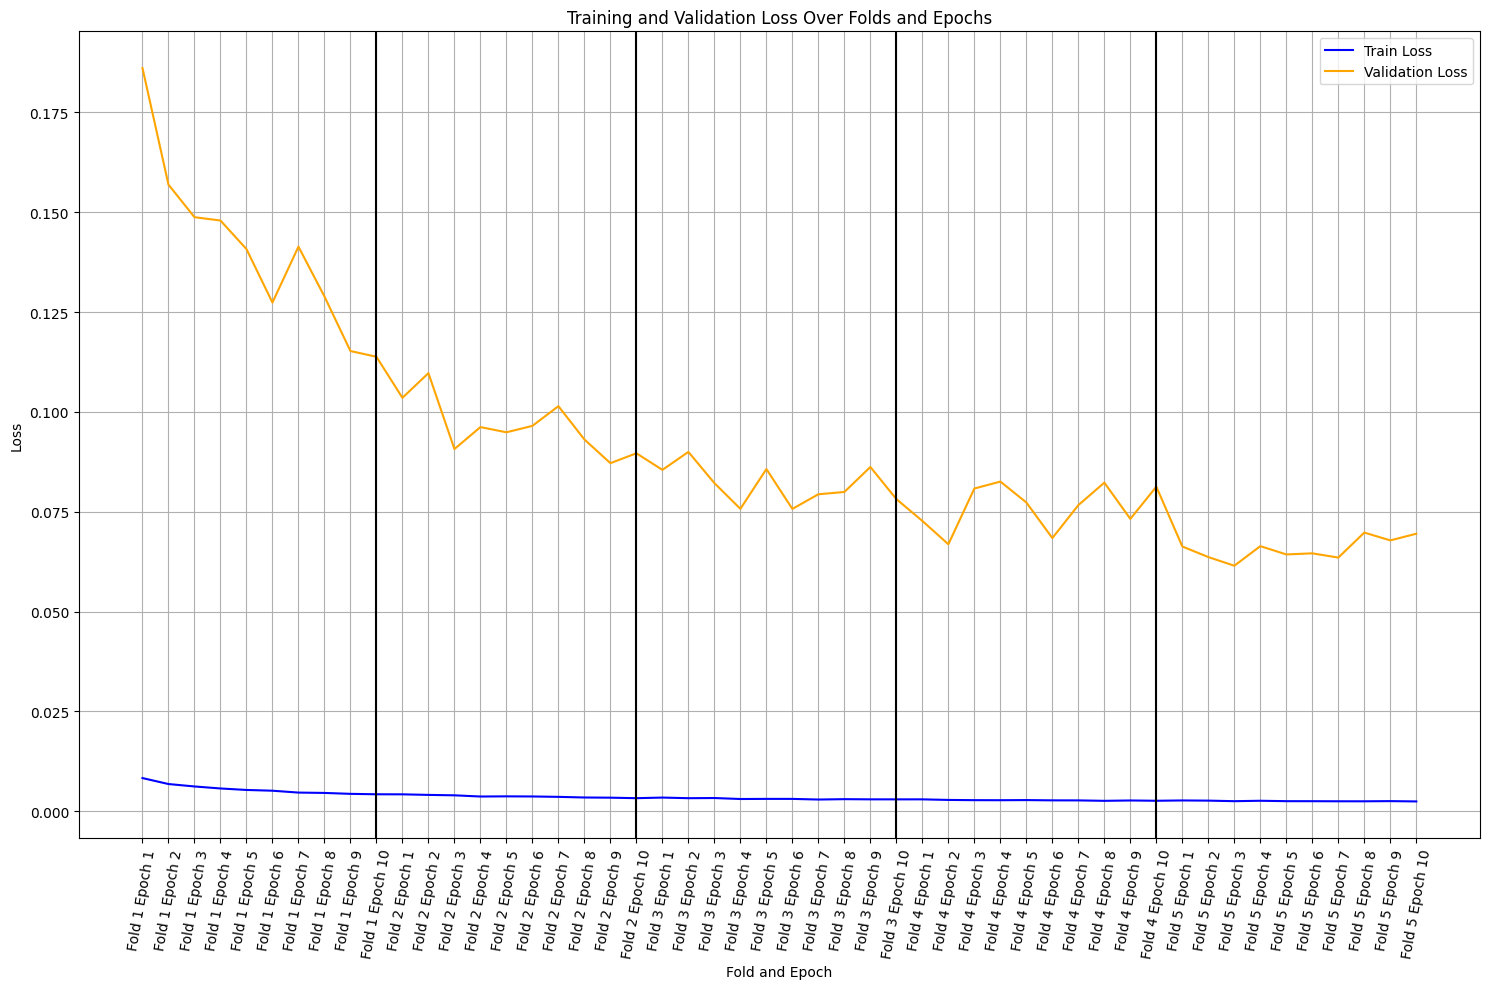

In [ ]:
num_folds = folds
num_epochs_per_fold = 10


folds_epochs = []
for fold in range(1, num_folds + 1):
    for epoch in range(1, num_epochs_per_fold + 1):
        folds_epochs.append(f'Fold {fold} Epoch {epoch}')


plt.figure(figsize=(15, 10))
plt.plot(folds_epochs, train_losses, label='Train Loss', color='blue')
plt.plot(folds_epochs, val_losses, label='Validation Loss', color='orange')


for i in range(1, num_folds):
    plt.axvline(x=i * num_epochs_per_fold -1 , color='black', linestyle='-')

plt.xlabel('Fold and Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Folds and Epochs')
plt.xticks(rotation=80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Model osiągnął najlepsze wyniki Foldzie 5 epoka 3 (czyli można powiedzieć że w 43 epoce), oto dokładne rezultaty:
*   training loss: 0.0025270772447613644
*   validation loss: 0.061474887062851306

### Wyniki uzyskane przez ten model mówią o tym, że działanie modelu jest jak najbardziej poprawne lecz wykazuje oznaki przetrenowania

### Co ciekawe, model wybrany przy użyciu optymalizacji bayesowskiej osiągnął gorsze wyniki niż nasz pierwotny model ze standardowymi wartościami hiperparametrów - dlaczego?

### Nasze oba modele osiągnęły bardzo niskie straty treningowe i walidacyjne co wskazuje na bardzo dobre dopasowanie do danych. Model uzyskany poprzez optymalizację bayesowską ma nieco wyższą stratę treningową - nie jest w stanie tak dobrze dopasować się do danych treningowych jak model pierwotny. Dodatkowo ukazuje się że model pierwotny lepiej generalizuje niż model z optymalizacji bayesowskiej, ponieważ jego strata walidacyjna jest niższa.

### Przyczyną gorszych rezultatów w modelu wybranym przez optymalzację bayesowską może być to, że optymalizacja bayesowska prowadzi do wyboru bardzo specyficznych hiperparametrów - optymalizator RMSprop z bardzo niską wartością współczynnika uczenia może prowadzić do wolniejszej konwergencji natomiast optymalizator SGD z momentum pozwala na szybsze i bardziej stabilne uczenie, szczególnie w przypadku dużych i złożonych zbiorów danych - takich jak nasz. Wyższe momentum w SGD może pomagać w lepszym radzeniu sobie z gradientami i unikać minimów lokalnych. Niska wartość learning rate może spowodować, że model nie będzie w stanie dostatecznie dobrze uczyć się na danych, co wpłynie negatywnie na jego wydajność na zbiorze walidacyjnym.

### Gorsze rezultaty w przypadku modelu uzyskanym przy optymalizacji bayesowskiej mogą być również spowodowane niewłaściwym dobraniem zakresów hiperparametrów podczas optymalizacji, wpływ na taki rezultat mogła mieć również zbyt mała ilość prób przy optymalizacji - wykonanie 50 prób mogło być niewystarczające, aby w pełni eksplorować przestrzeń hiperparametrów.

## Wykres Training & Validation Recall na przestrzeni epok w każdym foldzie  

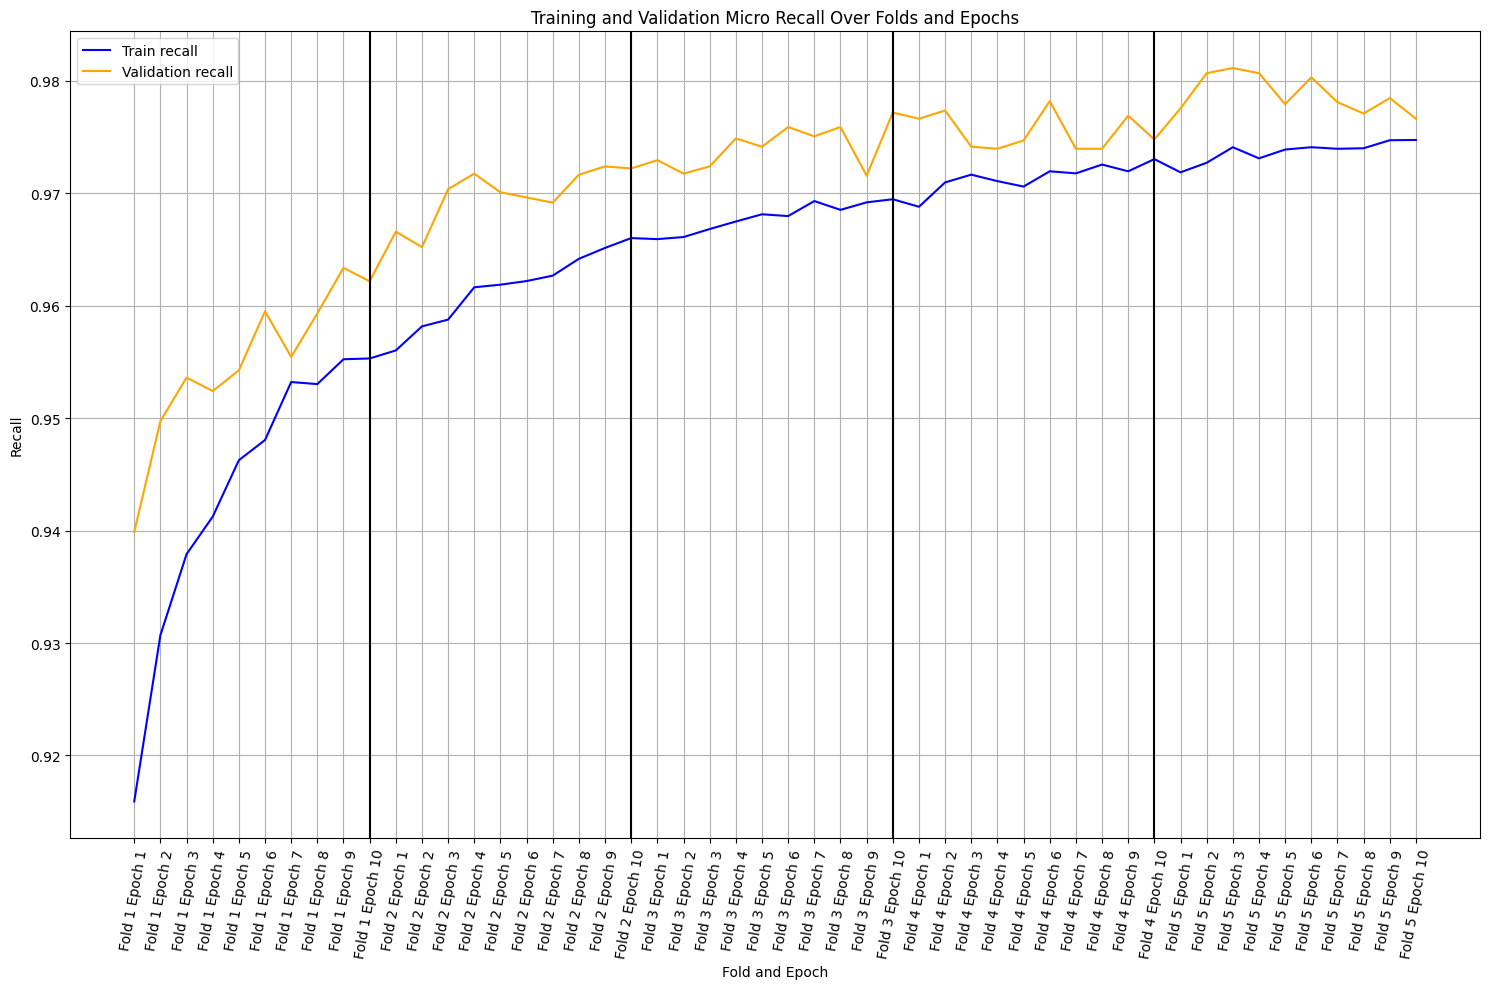

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(folds_epochs, train_recalls, label='Train recall', color='blue')
plt.plot(folds_epochs, val_recalls, label='Validation recall', color='orange')


for i in range(1, num_folds):
    plt.axvline(x=i * num_epochs_per_fold -1 , color='black', linestyle='-')

plt.xlabel('Fold and Epoch')
plt.ylabel('Recall')
plt.title('Training and Validation Micro Recall Over Folds and Epochs')
plt.xticks(rotation=80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Podobnie jak w przypadku traning & validation loss nasz model osiągnął najlepsze wyniki recall w Foldzie 5 epoka 3

*   Training recall: 0.9716423063643688
*   Valid recall: 0.9741276125586963
### Powyższe wyniki są bardzo dobre i wskazują że model bardzo dobrze rozpoznaje pozytywne przypadki - zarówno w zbiorze treningowym jak i walidacyjnym jest to ok. 97% prawidłowo rozpoznanych obrazów. Wyniki te jednakże ponownie są niższe, niż te uzyskane przy modelu ze standarowymi ustawieniami hiperparametrów - wynika to z omówionych wcześniej względów




## Wykres Training & Validation Recall na przestrzeni epok w każdym foldzie  dla każdej klasy

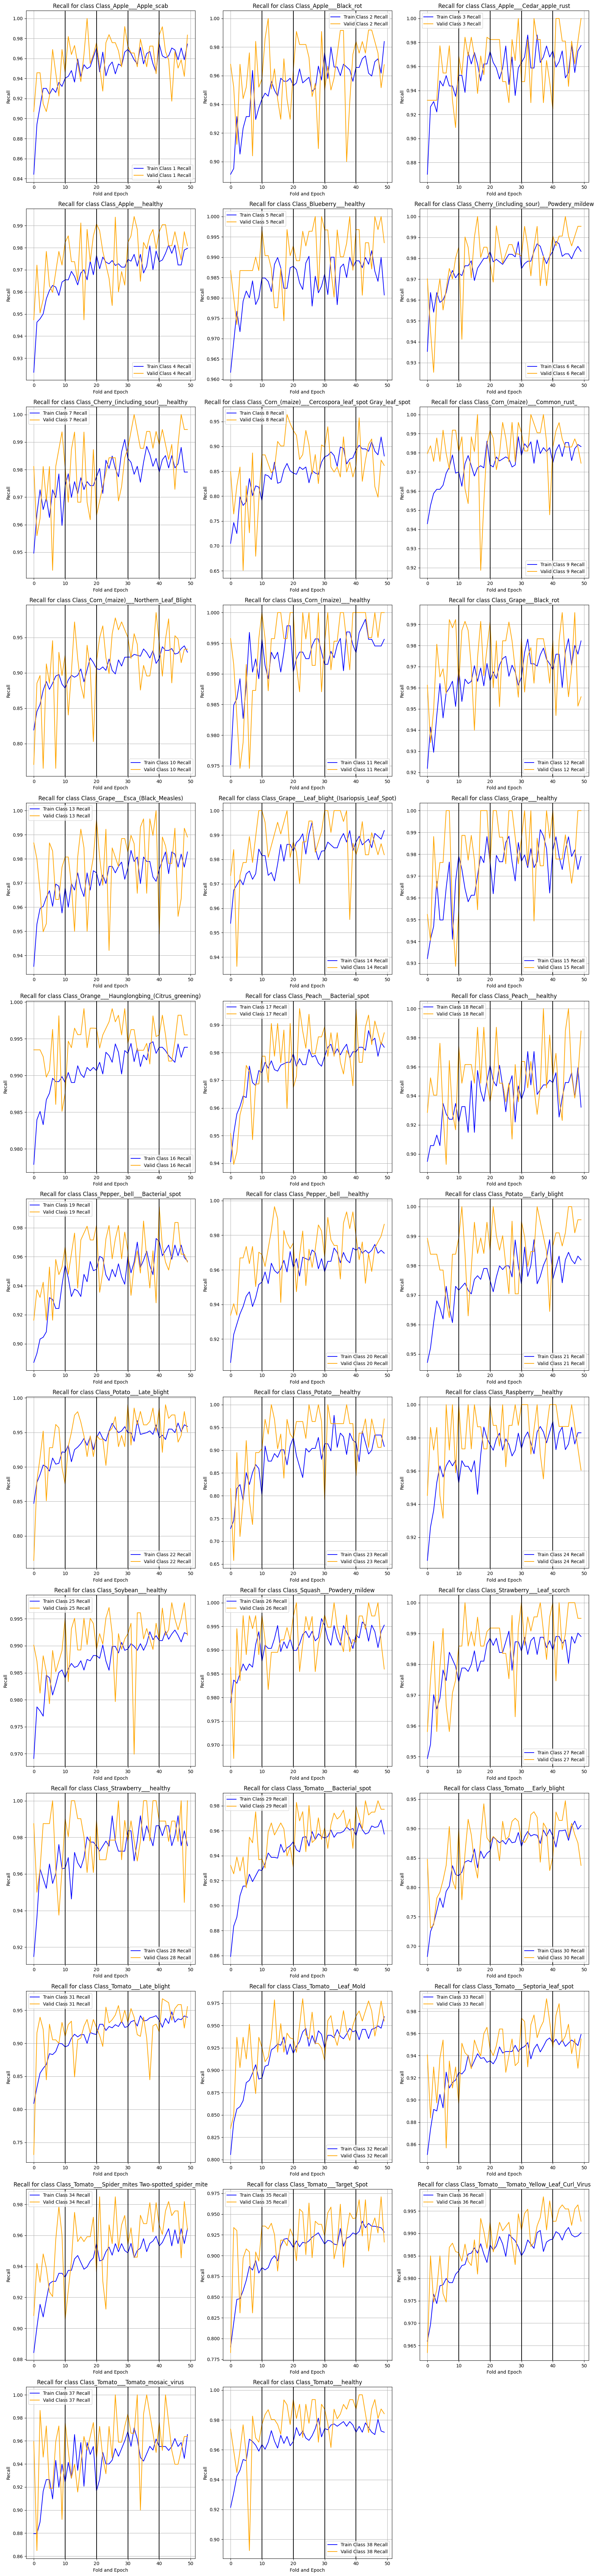

In [ ]:
dataset_classes = [f'Class_{class_name}' for class_name in dataset.classes]

# Przygotowanie danych
training_class_recalls = {i: [] for i in range(1, 39)}
for recalls in train_class_recalls:
    for class_idx, recall in enumerate(recalls, start=1):
        training_class_recalls[class_idx].append(recall)

valid_class_recalls = {i: [] for i in range(1, 39)}
for recalls in val_class_recalls:
    for class_idx, recall in enumerate(recalls, start=1):
        valid_class_recalls[class_idx].append(recall)


num_classes = 38


num_cols = 3
num_rows = (num_classes + num_cols - 1) // num_cols

# Tworzenie wykresów
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axs = axs.flatten()

for class_idx in range(1, num_classes + 1):
    axs[class_idx - 1].plot(training_class_recalls[class_idx], label=f'Train Class {class_idx} Recall', color='blue')
    axs[class_idx - 1].plot(valid_class_recalls[class_idx], label=f'Valid Class {class_idx} Recall', color='orange')


    for i in range(1, num_folds):
        axs[class_idx - 1].axvline(x=i * num_epochs_per_fold, color='black', linestyle='-')

    axs[class_idx - 1].set_xlabel('Fold and Epoch')
    axs[class_idx - 1].set_ylabel('Recall')
    axs[class_idx - 1].set_title(f'Recall for class {dataset_classes[class_idx - 1]}')
    axs[class_idx - 1].legend()
    axs[class_idx - 1].grid(True)

# Usuwanie pustych wykresów
for i in range(num_classes, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

### Powyższy wykres przedstawia zmianę metryki recall na przestrzeni epok w różnych foldach dla każdej klasy osobno

### Na podstawie załączonych wykresów możemy powiedzieć, że model najlepiej klasyfikuje obrazy klas (recall = 1 [100% poprawnie rozpoznanych obrazów]):

*   Apple scab
*   Apple black root
*   Cedar apple rust
*   Blueberry healthy
*   Cherry (including sour) powdery mildew
*   Cherry (including sour) healthy
*   Corn (maize) common rust
*   Corn (maize) healthy
*   Grape Esca (black measles)
*   Grape leaf blight (isariopsis leaf spot)
*   Orange haunglongbing (Cirtur greening)
*   Grape Healthy
*   Peach healthy
*   Potato early blight
*   Potato healthy
*   Raspberry healthy
*   Squash powdery mildew
*   Strawberry leaf scorch
*   Strawberry healthy

(łącznie 19 klas zostalo rozpoznanych ze 100% skutecznością)

### Najgorzej obrazy klasy Tomato early blight (recall = 0.9473684210526315)

### Ponownie uzyskane rezultaty są gorsze niż w przypadku modelu ze standardowymi ustawieniami hiperparametrów - przyczyny tej anomalii omówione zostały wcześniej

Szukanie najniższej z najwyższych wartości recall

In [ ]:
c30 = []
for i in range(0,50):
  c30.append(val_class_recalls[i][29])

max_c30 = max(c30) if c30 else None

print("Największa wartość w c30:", max_c30)

Największa wartość w c10: 0.9473684210526315


# **Test najlepszego modelu**

## Wczytanie najlepszego modelu

In [ ]:
def load_checkpoint_best_model(file_path, model):
    checkpoint = torch.load(file_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])

trained_model_path = '/content/drive/MyDrive/Colab Notebooks/checkpoints/model_fold_4_epoch_10.pt'
load_checkpoint_best_model(trained_model_path, model)


## Testowanie

### Przygotowanie danych do testowania

In [ ]:
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import train_test_split

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
torch.manual_seed(0)

dataset = ImageFolder(data_dir, transform = test_transform)


test_size = int(0.1 * len(dataset))

indices = list(range(len(dataset)))

_, test_indices = train_test_split(indices, test_size=test_size, random_state=453)

test_sampler = SubsetRandomSampler(test_indices)

test_data_loader = DataLoader(dataset, batch_size=32, shuffle=False,sampler=test_sampler, num_workers=2, pin_memory=True)

### Funkcja testująca

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import torch
import seaborn as sns
import matplotlib.pyplot as plt

def test_loop(model, test_loader):
    model.eval()
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_preds = []
    all_targets = []
    all_probs = []
    num_classes = 38

    with torch.no_grad():
        for image, label in test_loader:

            image = image.to(device)
            label = label.to(device)

            outputs = model(image)

            loss = criterion(outputs, label)

            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_predictions += label.size(0)

            correct_predictions += (predicted == label).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(label.cpu().numpy())
            all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())

    avg_loss = test_loss / len(test_loader)
    accuracy = correct_predictions / total_predictions
    precision = precision_score(all_targets, all_preds, average='micro')
    recall = recall_score(all_targets, all_preds, average='micro')
    f1 = f1_score(all_targets, all_preds, average='micro')


    roc_auc = roc_auc_score(all_targets, all_probs, multi_class='ovo', average='macro')


    print(f'Test Loss: {avg_loss}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    print(f'ROC AUC: {roc_auc:.4f}')

    print('Classification Report:')
    print(classification_report(all_targets, all_preds, target_names=[str(i) for i in range(num_classes)]))

    return all_targets, all_preds




### Przeprowadzenie testu

In [ ]:
all_targets, all_preds = test_loop(model, test_data_loader)

Test Loss: 0.012258776932648128
Accuracy: 0.9956
Precision: 0.9956
Recall: 0.9956
F1 Score: 0.9956
ROC AUC: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00       153
           4       1.00      1.00      1.00       152
           5       1.00      1.00      1.00       104
           6       1.00      1.00      1.00        93
           7       0.81      1.00      0.90        44
           8       1.00      1.00      1.00       119
           9       1.00      0.90      0.95       103
          10       1.00      1.00      1.00       120
          11       1.00      1.00      1.00       136
          12       1.00      1.00      1.00       123
          13       0.99      0.99      0.99        95
          14       1.00      1.00      1.00        

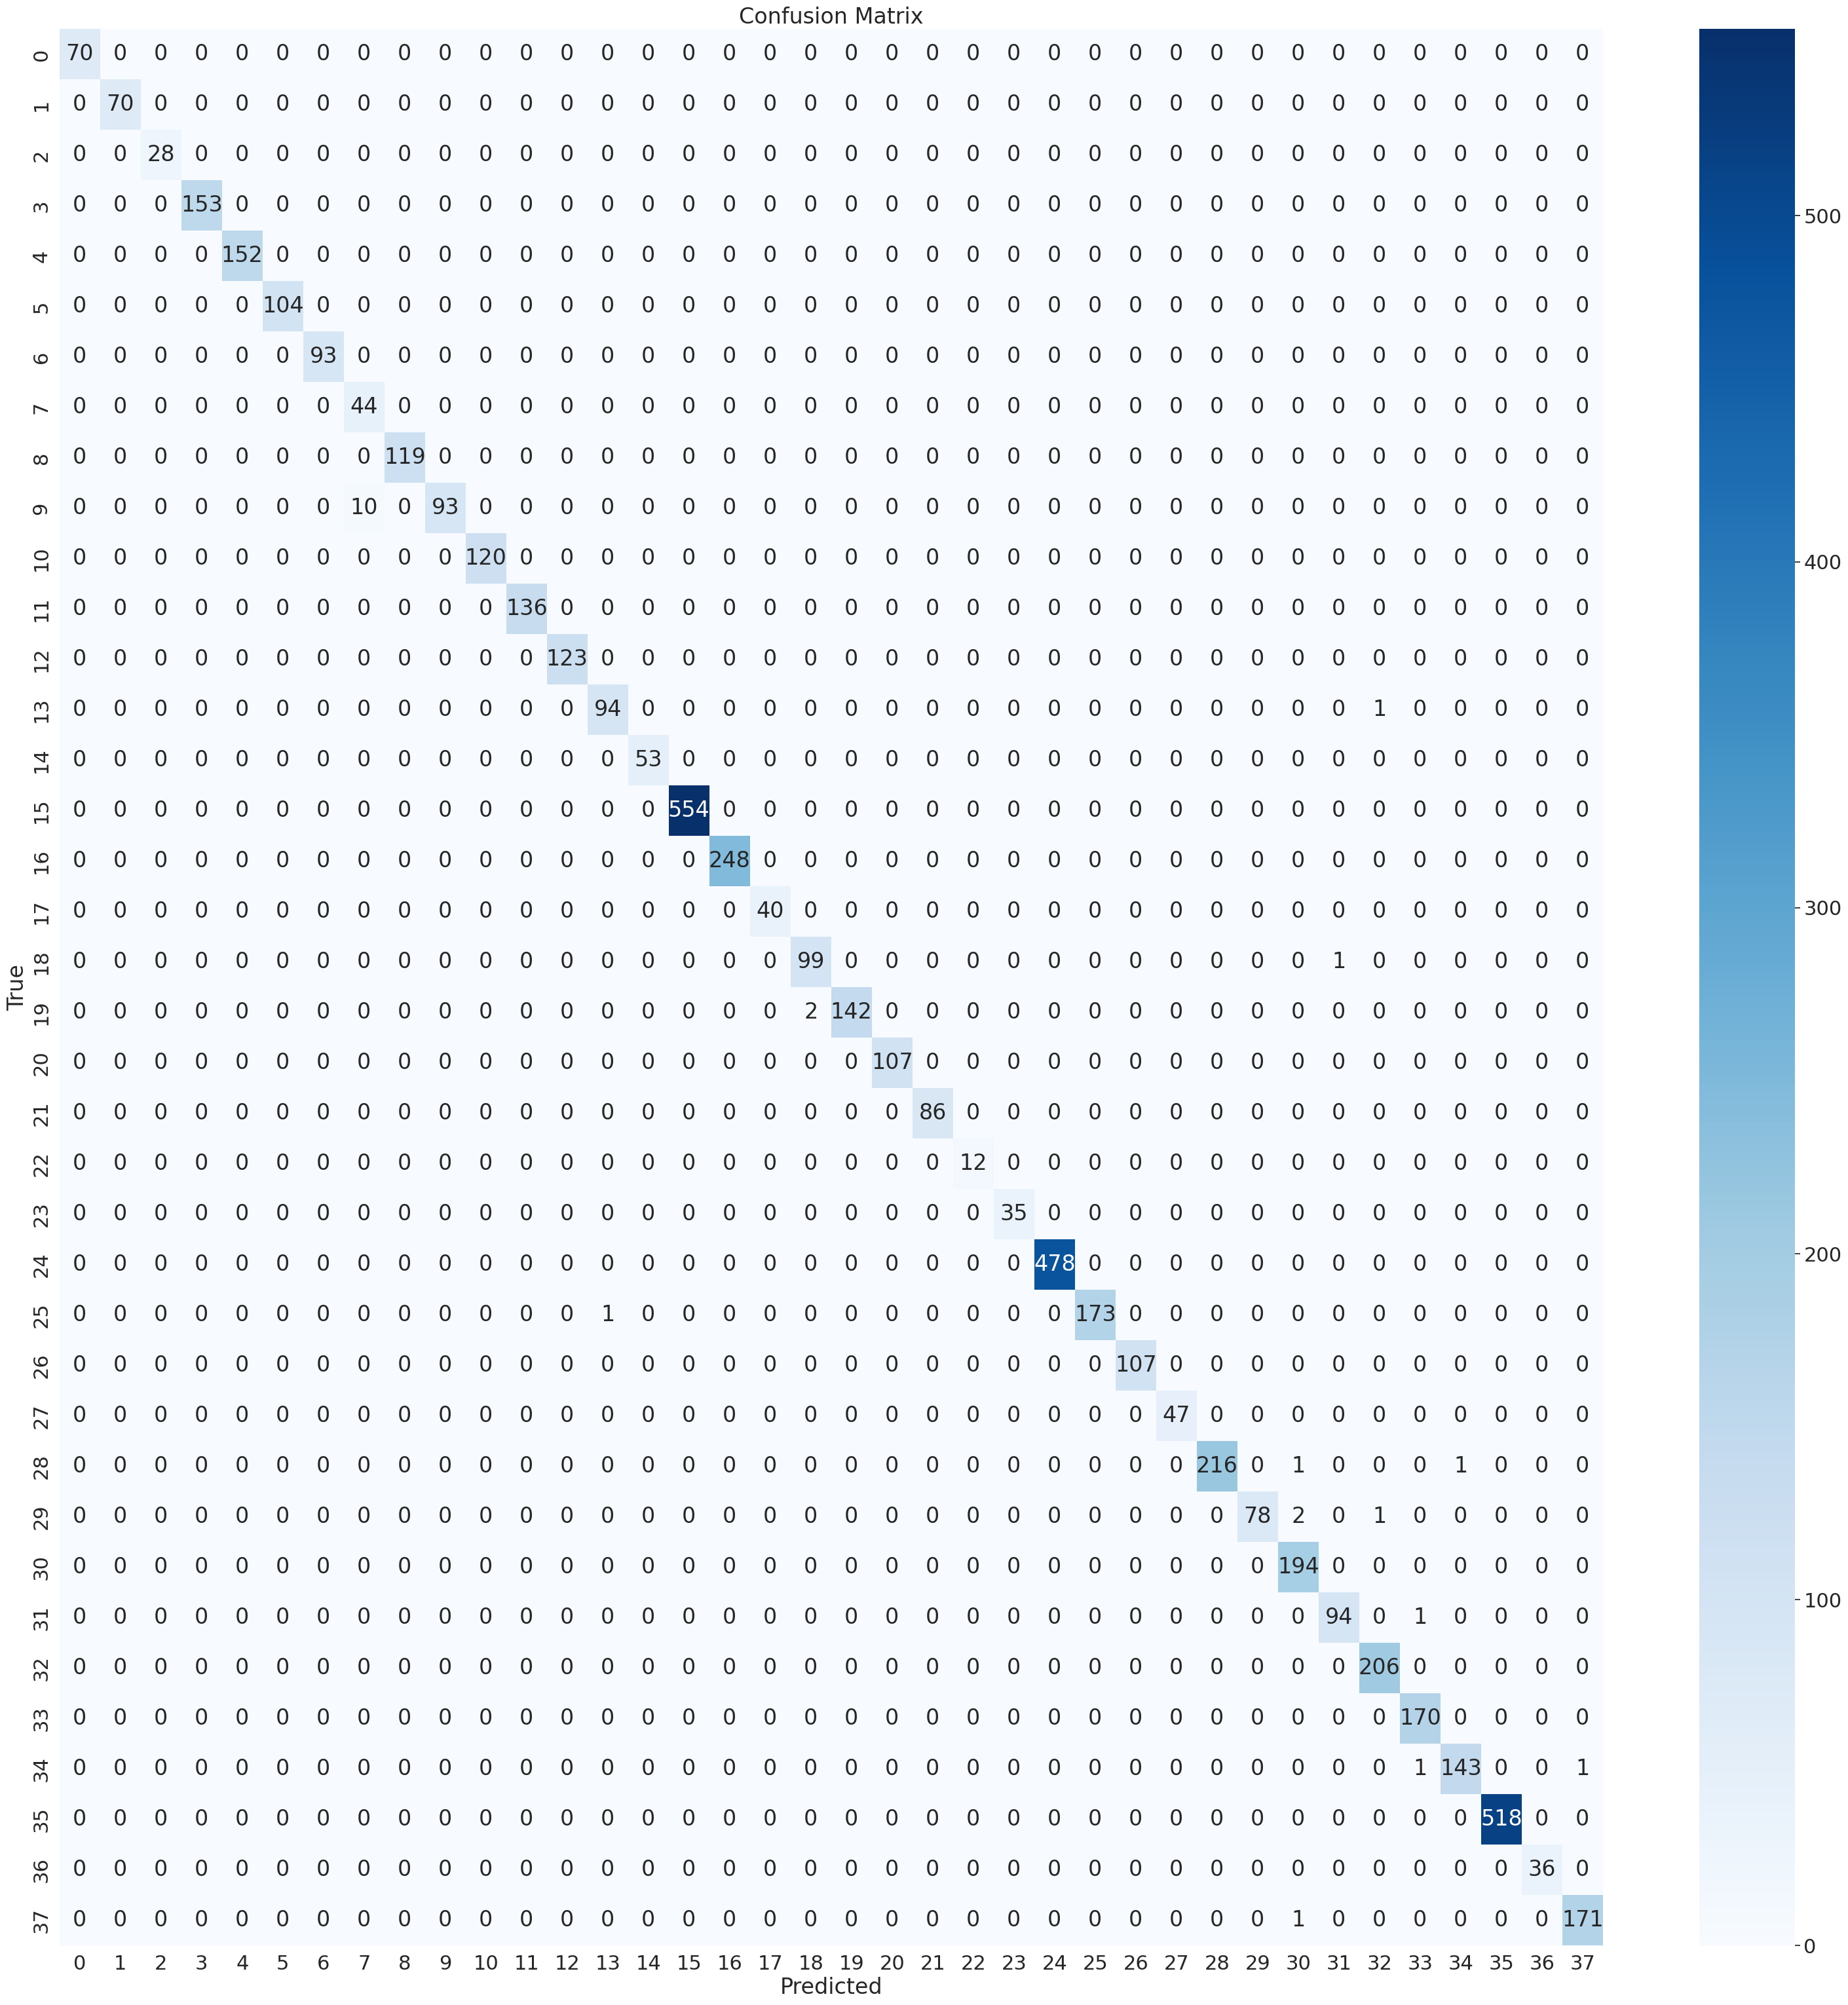

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(38, 38))
sns.set(font_scale=2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(38), yticklabels=np.arange(38))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

## Dodatkowy test na własnych danych

In [ ]:
import torch
import shutil
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

test_transform = transforms.Compose([
    transforms.Resize((3024,4032)),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_dir = '/content/drive/MyDrive/iloveimg-converted.zip (Unzipped Files)-20240615T163453Z-001'



dataset = ImageFolder(data_dir, transform=test_transform)


data_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)


In [ ]:
import torch.nn.functional as F
import pandas as pd
from natsort import natsorted
def test_loop(model, data_loader, classes):
    model.eval()
    results = []


    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(data_loader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = F.softmax(outputs, dim=1)


            batch_samples = data_loader.dataset.samples[batch_idx * data_loader.batch_size : (batch_idx + 1) * data_loader.batch_size]
            for i in range(len(labels)):
                image_path, true_label = batch_samples[i]
                predicted_label_idx = preds[i].argmax().item()
                image_name = os.path.basename(image_path)
                results.append({
                    'image_name': image_name,
                    'predicted_label': classes[predicted_label_idx]
                })
    df_results = pd.DataFrame(results)
    df_sorted = df_results.reindex(natsorted(df_results.index, key=df_results['image_name'].get))
    return df_sorted



In [ ]:
df_results = test_loop(model, data_loader, dataset_transformed.classes)

In [ ]:
df_results

image_name                         predicted_label
0       1.jpg  Tomato___Tomato_Yellow_Leaf_Curl_Virus
11      2.jpg  Tomato___Tomato_Yellow_Leaf_Curl_Virus
22      3.jpg                 Squash___Powdery_mildew
30      4.jpg  Tomato___Tomato_Yellow_Leaf_Curl_Virus
31      5.jpg                  Corn_(maize)___healthy
32      6.jpg                    Strawberry___healthy
33      7.jpg                  Corn_(maize)___healthy
34      8.jpg                Strawberry___Leaf_scorch
35      9.jpg                  Corn_(maize)___healthy
1      10.jpg                     Raspberry___healthy
2      11.jpg                     Raspberry___healthy
3      12.jpg                  Corn_(maize)___healthy
4      13.jpg                  Corn_(maize)___healthy
5      14.jpg                    Tomato___Late_blight
6      15.jpg                  Corn_(maize)___healthy
7      16.jpg                    Tomato___Late_blight
8      17.jpg  Tomato___Tomato_Yellow_Leaf_Curl_Virus
9      18.jpg                    Tomato___Late_blight
10     19.jpg                      Tomato___Leaf_Mold
12     20.jpg                  Corn_(maize)___healthy
13     21.jpg                  Corn_(maize)___healthy
14     22.jpg           Pepper,_bell___Bacterial_spot
15     23.jpg           Pepper,_bell___Bacterial_spot
16     24.jpg           Pepper,_bell___Bacterial_spot
17     25.jpg                    Strawberry___healthy
18     26.jpg                    Strawberry___healthy
19     27.jpg                    Strawberry___healthy
20     28.jpg                  Corn_(maize)___healthy
21     29.jpg                  Corn_(maize)___healthy
23     30.jpg                    Strawberry___healthy
24     31.jpg                  Corn_(maize)___healthy
25     32.jpg  Tomato___Tomato_Yellow_Leaf_Curl_Virus
26     33.jpg                  Corn_(maize)___healthy
27     34.jpg                  Corn_(maize)___healthy
28     35.jpg           Pepper,_bell___Bacterial_spot
29     36.jpg           Pepper,_bell___Bacterial_spot